In [1]:
import matplotlib.pyplot as plt
import csv


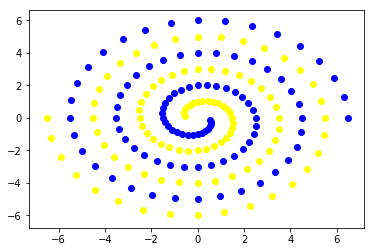

Total dataset m:  192


In [154]:
# taken from two-spirals.c by Matt White
import math

def create_spiral_dataset(density=1, maxRadius=6.5):
    x_spiral = []
    y_spiral = []
    points = math.ceil(96 * density) # total number of points to generate
    
    for num in range(points):
        # Angle is based on the current iteration times pi/16, divided by density
        angle = (num * math.pi) / ( 16.0 * density)
        
        # Radius is the maximum radius times the fraction of iterations left
        radius = maxRadius * ( (104.0 * density) - num) / (104.0 * density)
        
        # calculate x and y based on cos and sin, according to the paper
        x_cos = radius * math.cos(angle)
        y_sin = radius * math.sin(angle)
        
        x_spiral.append([x_cos, y_sin]) # non mirror point
        y_spiral.append([0]) # label for non mirror
        x_spiral.append([-x_cos, -y_sin]) # mirroring point for the spiral that goes the other way around
        y_spiral.append([1]) # label mirror
        
    return x_spiral, y_spiral

x, y = create_spiral_dataset(density=1)

blue_x = []
blue_y = []
yellow_x = []
yellow_y = []

for idx, point in enumerate(x):
    if y[idx][0] == 0:
        # non-mirror, blue
        blue_x.append(point[0])
        blue_y.append(point[1])
    else:
        yellow_x.append(point[0])
        yellow_y.append(point[1])

plt.scatter(blue_x, blue_y, color='blue')
plt.scatter(yellow_x, yellow_y, color='yellow')

plt.show()

print('Total dataset m: ', len(blue_x) + len(blue_y))

        

In [155]:
import tensorflow as tf
import numpy as np

# convert dataset into numpy array
np_x = np.array(x) # features 
np_y = np.array(y) # labels

combined_x_y = np.array(list(zip(x, y)))
np.random.shuffle(combined_x_y)

# separate data into train, validation and test sets
training_size = math.floor(combined_x_y.shape[0] * 0.70)
validation_size = math.floor(combined_x_y.shape[0] * 0.20)
test_size = combined_x_y.shape[0] - training_size - validation_size
training_set = combined_x_y[:training_size]
validation_set = combined_x_y[training_size: training_size + validation_size]
test_set = combined_x_y[training_size + validation_size:]

print("training set: ", training_size)
print("validation set: ", validation_size)
print("test set: ", test_size)

print("total dataset: ", combined_x_y.shape)
print("training set: ", training_set.shape)
print("validation set: ", validation_set.shape)
print("test set: ", test_set.shape)

# https://stackoverflow.com/questions/12974474/how-to-unzip-a-list-of-tuples-into-individual-lists
# The zip() function pairs up the elements from all inputs, starting with the first values, then the
# second, etc. By using *l you apply all tuples in l as separate arguments to the zip() function, so
# zip() pairs up 1 with 3 with 8 first, then 2 with 4 and 9. 
# Those happen to correspond nicely with the columns, or the transposition of l.
unzip_training = np.array(list(zip(*training_set)))
training_x = np.array([np.array(x) for x in unzip_training[0]])
training_y = np.array([np.array(y) for y in unzip_training[1]])

print('training_x: ', training_x.shape)
print('training_y: ', training_y.shape)

unzip_validation = np.array(list(zip(*validation_set))) 
validation_x = np.array([np.array(x) for x in unzip_validation[0]])
validation_y = np.array([np.array(y) for y in unzip_validation[1]])

print('validation_x: ', validation_x.shape)
print('validation_y: ', validation_y.shape)

unzip_test = np.array(list(zip(*test_set))) 
test_x = np.array([np.array(x) for x in unzip_test[0]])
test_y = np.array([np.array(y) for y in unzip_test[1]])

print('test_x: ', test_x.shape)
print('test_y: ', test_y.shape)


training set:  134
validation set:  38
test set:  20
total dataset:  (192, 2)
training set:  (134, 2)
validation set:  (38, 2)
test set:  (20, 2)
training_x:  (134, 2)
training_y:  (134, 1)
validation_x:  (38, 2)
validation_y:  (38, 1)
test_x:  (20, 2)
test_y:  (20, 1)


In [156]:
# placeholders for data
x_pl = tf.placeholder(tf.float32, [None, np_x.shape[1]], name='feature_inputs')
y_pl = tf.placeholder(tf.float32, [None, np_y.shape[1]], name='labels')

# Average Error: 0.00128 (eye ball value)
# l0_units = 20
# l1_units = 40
# l2_units = 80

l0_units = 20
l1_units = 40
l2_units = 100

# l3_units = 80
# l4_units = 40
# l5_units = 20
# out = 2

# Neural Network
# 1st layer
l0_w = tf.Variable(tf.random_normal([2, l0_units]))
l0_b = tf.Variable(tf.random_normal([l0_units]))
l0 = tf.nn.sigmoid(tf.add(tf.matmul(x_pl, l0_w), l0_b))

# 2nd layer
l1_w = tf.Variable(tf.random_normal([l0_units, l1_units]))
l1_b = tf.Variable(tf.random_normal([l1_units]))
l1 = tf.nn.sigmoid(tf.add(tf.matmul(l0, l1_w), l1_b))

# 3rd layer
l2_w = tf.Variable(tf.random_normal([l1_units, l2_units]))
l2_b = tf.Variable(tf.random_normal([1]))
l2 = tf.nn.sigmoid(tf.add(tf.matmul(l1, l2_w), l2_b))

# 4rd layer
l3_w = tf.Variable(tf.random_normal([l2_units, 1]))
l3_b = tf.Variable(tf.random_normal([1]))
l3 = tf.nn.sigmoid(tf.add(tf.matmul(l2, l3_w), l3_b))

# 5rd layer
# l4_w = tf.Variable(tf.random_normal([l3_units, 1]))
# l4_b = tf.Variable(tf.random_normal([1]))
# l4 = tf.nn.sigmoid(tf.add(tf.matmul(l3, l4_w), l4_b))

# 6rd layer
# l5_w = tf.Variable(tf.random_normal([l4_units, l5_units]))
# l5_b = tf.Variable(tf.random_normal([l5_units]))
# l5 = tf.nn.sigmoid(tf.add(tf.matmul(l4, l5_w), l5_b))

# output layer
# out_w = tf.Variable(tf.random_normal([l5_units, 1]))
# out_b = tf.Variable(tf.random_normal([l5_units]))
# out = tf.add(tf.matmul(l5, out_w), out_b)

# cost function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_pl, predictions=l3))

# optimizer algorithm
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.3).minimize(cost)
# optimizer = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(cost)
optimizer = tf.train.MomentumOptimizer(learning_rate=0.5, momentum=0.6).minimize(cost)

In [157]:
# Required: Run previous cell to create the neural network model
# training
n_epochs = 25000

errors = []
training_errors = [] # error in training for each epoch
validation_accuracy = [] # accuracy in validation for each epoch
predictions = None
activation_range = np.arange(-10, 10, 0.1)
coordinates = [[x, y] for x in activation_range for y in activation_range]

with tf.Session() as sess:
    # tf.global_variables_initializer().run()
    
    sess.run(tf.global_variables_initializer())
    for i in range(n_epochs):
        _, error = sess.run([optimizer, cost], feed_dict={x_pl: np_x, y_pl: np_y})
        errors.append(error)
        print('epoch: ', i, 'error: ', error)
        
        # Use train, validation, test set
        # _, train_err = sess.run([optimizer, cost], feed_dict={x_pl: training_x, y_pl: training_y})
        # training_errors.append(train_err)
        # validation_pred = [np.round(pred) for pred in sess.run(l5, feed_dict={x_pl: validation_x})]
        # 
        # # difference = (validation_pred == validation_y).astype(int)
        # difference = np.array([y_prime[0] == y[0] for y_prime, y in zip(validation_pred, validation_y) ]).astype(int)
        # 
        # total_correct_pred = np.sum(difference)
        # accuracy = total_correct_pred / validation_y.shape[0]
        # validation_accuracy.append(accuracy)
        # print('epoch: ', i, 'training error: ', train_err, 'accuracy: ', accuracy)
        
    # Use the trained model to classify all points in a 10 x 10 graph
    predictions = sess.run(l3, feed_dict={x_pl: coordinates}) # use numpy.round?

epoch:  0 error:  0.34907243
epoch:  1 error:  0.30709884
epoch:  2 error:  0.29855132
epoch:  3 error:  0.29527125
epoch:  4 error:  0.2666658
epoch:  5 error:  0.2613379
epoch:  6 error:  0.26408082
epoch:  7 error:  0.2642112
epoch:  8 error:  0.26084948
epoch:  9 error:  0.25641048
epoch:  10 error:  0.25331295
epoch:  11 error:  0.2512288
epoch:  12 error:  0.24983448
epoch:  13 error:  0.24882913
epoch:  14 error:  0.24807596
epoch:  15 error:  0.2474945
epoch:  16 error:  0.24704568
epoch:  17 error:  0.24671336
epoch:  18 error:  0.24651396
epoch:  19 error:  0.24646516
epoch:  20 error:  0.24661924
epoch:  21 error:  0.24697518
epoch:  22 error:  0.24758518
epoch:  23 error:  0.24830657
epoch:  24 error:  0.24913625
epoch:  25 error:  0.24968685
epoch:  26 error:  0.25003812
epoch:  27 error:  0.24981849
epoch:  28 error:  0.2494287
epoch:  29 error:  0.24868862
epoch:  30 error:  0.24804522
epoch:  31 error:  0.24732184
epoch:  32 error:  0.24679624
epoch:  33 error:  0.24626

epoch:  338 error:  0.2259659
epoch:  339 error:  0.22592549
epoch:  340 error:  0.22590077
epoch:  341 error:  0.22586022
epoch:  342 error:  0.22583555
epoch:  343 error:  0.22579491
epoch:  344 error:  0.22577028
epoch:  345 error:  0.22572958
epoch:  346 error:  0.22570495
epoch:  347 error:  0.22566412
epoch:  348 error:  0.22563954
epoch:  349 error:  0.22559865
epoch:  350 error:  0.22557409
epoch:  351 error:  0.22553302
epoch:  352 error:  0.2255085
epoch:  353 error:  0.22546732
epoch:  354 error:  0.22544281
epoch:  355 error:  0.2254016
epoch:  356 error:  0.2253771
epoch:  357 error:  0.22533578
epoch:  358 error:  0.22531134
epoch:  359 error:  0.22526987
epoch:  360 error:  0.22524543
epoch:  361 error:  0.22520392
epoch:  362 error:  0.22517951
epoch:  363 error:  0.22513784
epoch:  364 error:  0.2251135
epoch:  365 error:  0.22507174
epoch:  366 error:  0.22504745
epoch:  367 error:  0.22500552
epoch:  368 error:  0.2249813
epoch:  369 error:  0.22493924
epoch:  370 er

epoch:  612 error:  0.21695058
epoch:  613 error:  0.21688537
epoch:  614 error:  0.21688932
epoch:  615 error:  0.2168237
epoch:  616 error:  0.21682806
epoch:  617 error:  0.21676208
epoch:  618 error:  0.21676683
epoch:  619 error:  0.21670051
epoch:  620 error:  0.21670575
epoch:  621 error:  0.21663909
epoch:  622 error:  0.21664472
epoch:  623 error:  0.21657775
epoch:  624 error:  0.2165839
epoch:  625 error:  0.21651654
epoch:  626 error:  0.216523
epoch:  627 error:  0.21645527
epoch:  628 error:  0.21646214
epoch:  629 error:  0.21639411
epoch:  630 error:  0.21640138
epoch:  631 error:  0.21633296
epoch:  632 error:  0.21634068
epoch:  633 error:  0.21627188
epoch:  634 error:  0.21628009
epoch:  635 error:  0.21621089
epoch:  636 error:  0.21621954
epoch:  637 error:  0.21614997
epoch:  638 error:  0.21615903
epoch:  639 error:  0.21608913
epoch:  640 error:  0.21609862
epoch:  641 error:  0.21602838
epoch:  642 error:  0.21603827
epoch:  643 error:  0.21596754
epoch:  644 

epoch:  879 error:  0.20902224
epoch:  880 error:  0.20908569
epoch:  881 error:  0.20896406
epoch:  882 error:  0.209028
epoch:  883 error:  0.20890589
epoch:  884 error:  0.20897026
epoch:  885 error:  0.20884778
epoch:  886 error:  0.20891263
epoch:  887 error:  0.20878963
epoch:  888 error:  0.20885496
epoch:  889 error:  0.20873143
epoch:  890 error:  0.20879723
epoch:  891 error:  0.20867322
epoch:  892 error:  0.2087395
epoch:  893 error:  0.20861496
epoch:  894 error:  0.20868169
epoch:  895 error:  0.20855677
epoch:  896 error:  0.208624
epoch:  897 error:  0.20849852
epoch:  898 error:  0.20856626
epoch:  899 error:  0.20844026
epoch:  900 error:  0.20850854
epoch:  901 error:  0.20838208
epoch:  902 error:  0.20845075
epoch:  903 error:  0.20832384
epoch:  904 error:  0.208393
epoch:  905 error:  0.20826556
epoch:  906 error:  0.20833522
epoch:  907 error:  0.2082073
epoch:  908 error:  0.20827745
epoch:  909 error:  0.20814908
epoch:  910 error:  0.20821972
epoch:  911 erro

epoch:  1229 error:  0.19865216
epoch:  1230 error:  0.19881928
epoch:  1231 error:  0.19859195
epoch:  1232 error:  0.19875973
epoch:  1233 error:  0.19853179
epoch:  1234 error:  0.19870026
epoch:  1235 error:  0.1984716
epoch:  1236 error:  0.19864075
epoch:  1237 error:  0.19841136
epoch:  1238 error:  0.19858114
epoch:  1239 error:  0.19835113
epoch:  1240 error:  0.19852161
epoch:  1241 error:  0.19829087
epoch:  1242 error:  0.19846207
epoch:  1243 error:  0.1982307
epoch:  1244 error:  0.19840258
epoch:  1245 error:  0.19817048
epoch:  1246 error:  0.1983431
epoch:  1247 error:  0.19811034
epoch:  1248 error:  0.1982836
epoch:  1249 error:  0.19805019
epoch:  1250 error:  0.19822414
epoch:  1251 error:  0.19799006
epoch:  1252 error:  0.1981647
epoch:  1253 error:  0.1979299
epoch:  1254 error:  0.19810522
epoch:  1255 error:  0.19786973
epoch:  1256 error:  0.19804578
epoch:  1257 error:  0.19780956
epoch:  1258 error:  0.1979863
epoch:  1259 error:  0.19774942
epoch:  1260 er

epoch:  1491 error:  0.19068973
epoch:  1492 error:  0.19095592
epoch:  1493 error:  0.19062638
epoch:  1494 error:  0.19089323
epoch:  1495 error:  0.19056292
epoch:  1496 error:  0.19083057
epoch:  1497 error:  0.1904995
epoch:  1498 error:  0.19076775
epoch:  1499 error:  0.19043584
epoch:  1500 error:  0.19070481
epoch:  1501 error:  0.19037211
epoch:  1502 error:  0.19064172
epoch:  1503 error:  0.19030821
epoch:  1504 error:  0.19057862
epoch:  1505 error:  0.19024444
epoch:  1506 error:  0.19051546
epoch:  1507 error:  0.19018047
epoch:  1508 error:  0.19045217
epoch:  1509 error:  0.19011635
epoch:  1510 error:  0.1903888
epoch:  1511 error:  0.19005227
epoch:  1512 error:  0.19032538
epoch:  1513 error:  0.18998803
epoch:  1514 error:  0.19026184
epoch:  1515 error:  0.18992378
epoch:  1516 error:  0.19019814
epoch:  1517 error:  0.18985927
epoch:  1518 error:  0.1901343
epoch:  1519 error:  0.18979478
epoch:  1520 error:  0.1900704
epoch:  1521 error:  0.18973012
epoch:  1522

epoch:  1767 error:  0.18105513
epoch:  1768 error:  0.18132514
epoch:  1769 error:  0.1809812
epoch:  1770 error:  0.18125056
epoch:  1771 error:  0.18090737
epoch:  1772 error:  0.18117595
epoch:  1773 error:  0.1808335
epoch:  1774 error:  0.18110128
epoch:  1775 error:  0.18075955
epoch:  1776 error:  0.18102665
epoch:  1777 error:  0.18068564
epoch:  1778 error:  0.18095194
epoch:  1779 error:  0.18061177
epoch:  1780 error:  0.18087737
epoch:  1781 error:  0.18053795
epoch:  1782 error:  0.18080282
epoch:  1783 error:  0.18046421
epoch:  1784 error:  0.18072832
epoch:  1785 error:  0.18039049
epoch:  1786 error:  0.18065381
epoch:  1787 error:  0.18031676
epoch:  1788 error:  0.18057929
epoch:  1789 error:  0.18024309
epoch:  1790 error:  0.18050487
epoch:  1791 error:  0.18016951
epoch:  1792 error:  0.18043053
epoch:  1793 error:  0.18009591
epoch:  1794 error:  0.18035603
epoch:  1795 error:  0.18002228
epoch:  1796 error:  0.1802817
epoch:  1797 error:  0.17994882
epoch:  179

epoch:  2028 error:  0.1723723
epoch:  2029 error:  0.17213356
epoch:  2030 error:  0.1723124
epoch:  2031 error:  0.17207426
epoch:  2032 error:  0.17225273
epoch:  2033 error:  0.17201512
epoch:  2034 error:  0.1721931
epoch:  2035 error:  0.171956
epoch:  2036 error:  0.17213362
epoch:  2037 error:  0.17189707
epoch:  2038 error:  0.17207424
epoch:  2039 error:  0.17183824
epoch:  2040 error:  0.172015
epoch:  2041 error:  0.17177953
epoch:  2042 error:  0.17195594
epoch:  2043 error:  0.17172098
epoch:  2044 error:  0.171897
epoch:  2045 error:  0.17166261
epoch:  2046 error:  0.17183828
epoch:  2047 error:  0.17160441
epoch:  2048 error:  0.17177968
epoch:  2049 error:  0.17154634
epoch:  2050 error:  0.17172122
epoch:  2051 error:  0.1714884
epoch:  2052 error:  0.17166297
epoch:  2053 error:  0.17143063
epoch:  2054 error:  0.17160474
epoch:  2055 error:  0.17137282
epoch:  2056 error:  0.17154662
epoch:  2057 error:  0.1713152
epoch:  2058 error:  0.17148864
epoch:  2059 error:

epoch:  2366 error:  0.1634902
epoch:  2367 error:  0.1633264
epoch:  2368 error:  0.16344272
epoch:  2369 error:  0.16327958
epoch:  2370 error:  0.16339533
epoch:  2371 error:  0.16323283
epoch:  2372 error:  0.1633481
epoch:  2373 error:  0.16318613
epoch:  2374 error:  0.16330095
epoch:  2375 error:  0.16313955
epoch:  2376 error:  0.16325383
epoch:  2377 error:  0.16309305
epoch:  2378 error:  0.1632068
epoch:  2379 error:  0.1630466
epoch:  2380 error:  0.16315983
epoch:  2381 error:  0.16300024
epoch:  2382 error:  0.16311294
epoch:  2383 error:  0.16295399
epoch:  2384 error:  0.16306621
epoch:  2385 error:  0.16290784
epoch:  2386 error:  0.1630196
epoch:  2387 error:  0.16286178
epoch:  2388 error:  0.162973
epoch:  2389 error:  0.16281581
epoch:  2390 error:  0.16292651
epoch:  2391 error:  0.16276991
epoch:  2392 error:  0.16288005
epoch:  2393 error:  0.16272412
epoch:  2394 error:  0.16283382
epoch:  2395 error:  0.1626784
epoch:  2396 error:  0.16278756
epoch:  2397 erro

epoch:  2633 error:  0.1579243
epoch:  2634 error:  0.15798287
epoch:  2635 error:  0.15789013
epoch:  2636 error:  0.15794845
epoch:  2637 error:  0.15785609
epoch:  2638 error:  0.15791412
epoch:  2639 error:  0.15782218
epoch:  2640 error:  0.15787987
epoch:  2641 error:  0.15778832
epoch:  2642 error:  0.15784572
epoch:  2643 error:  0.15775459
epoch:  2644 error:  0.15781166
epoch:  2645 error:  0.15772092
epoch:  2646 error:  0.15777774
epoch:  2647 error:  0.1576874
epoch:  2648 error:  0.15774389
epoch:  2649 error:  0.15765391
epoch:  2650 error:  0.15771013
epoch:  2651 error:  0.15762053
epoch:  2652 error:  0.15767649
epoch:  2653 error:  0.1575873
epoch:  2654 error:  0.15764292
epoch:  2655 error:  0.15755413
epoch:  2656 error:  0.15760948
epoch:  2657 error:  0.15752104
epoch:  2658 error:  0.15757611
epoch:  2659 error:  0.15748806
epoch:  2660 error:  0.15754282
epoch:  2661 error:  0.15745519
epoch:  2662 error:  0.15750967
epoch:  2663 error:  0.15742235
epoch:  266

epoch:  2897 error:  0.15414484
epoch:  2898 error:  0.15417862
epoch:  2899 error:  0.1541211
epoch:  2900 error:  0.15415478
epoch:  2901 error:  0.15409744
epoch:  2902 error:  0.15413103
epoch:  2903 error:  0.15407382
epoch:  2904 error:  0.15410735
epoch:  2905 error:  0.15405026
epoch:  2906 error:  0.15408368
epoch:  2907 error:  0.15402673
epoch:  2908 error:  0.15406014
epoch:  2909 error:  0.15400326
epoch:  2910 error:  0.15403663
epoch:  2911 error:  0.15397987
epoch:  2912 error:  0.15401311
epoch:  2913 error:  0.15395655
epoch:  2914 error:  0.15398972
epoch:  2915 error:  0.15393327
epoch:  2916 error:  0.15396641
epoch:  2917 error:  0.15391009
epoch:  2918 error:  0.15394314
epoch:  2919 error:  0.15388699
epoch:  2920 error:  0.15392
epoch:  2921 error:  0.15386392
epoch:  2922 error:  0.15389682
epoch:  2923 error:  0.15384087
epoch:  2924 error:  0.15387371
epoch:  2925 error:  0.15381786
epoch:  2926 error:  0.15385063
epoch:  2927 error:  0.15379488
epoch:  2928

epoch:  3185 error:  0.15117253
epoch:  3186 error:  0.1512018
epoch:  3187 error:  0.15115373
epoch:  3188 error:  0.151183
epoch:  3189 error:  0.15113491
epoch:  3190 error:  0.15116413
epoch:  3191 error:  0.15111615
epoch:  3192 error:  0.15114534
epoch:  3193 error:  0.15109733
epoch:  3194 error:  0.15112656
epoch:  3195 error:  0.15107863
epoch:  3196 error:  0.15110773
epoch:  3197 error:  0.15105985
epoch:  3198 error:  0.15108894
epoch:  3199 error:  0.15104112
epoch:  3200 error:  0.15107019
epoch:  3201 error:  0.15102239
epoch:  3202 error:  0.15105139
epoch:  3203 error:  0.15100367
epoch:  3204 error:  0.15103267
epoch:  3205 error:  0.1509849
epoch:  3206 error:  0.15101382
epoch:  3207 error:  0.15096615
epoch:  3208 error:  0.15099503
epoch:  3209 error:  0.1509475
epoch:  3210 error:  0.1509763
epoch:  3211 error:  0.1509288
epoch:  3212 error:  0.15095757
epoch:  3213 error:  0.15091012
epoch:  3214 error:  0.15093885
epoch:  3215 error:  0.15089142
epoch:  3216 er

epoch:  3444 error:  0.1487998
epoch:  3445 error:  0.14876215
epoch:  3446 error:  0.14878109
epoch:  3447 error:  0.14874357
epoch:  3448 error:  0.1487624
epoch:  3449 error:  0.14872496
epoch:  3450 error:  0.14874361
epoch:  3451 error:  0.14870635
epoch:  3452 error:  0.14872487
epoch:  3453 error:  0.14868768
epoch:  3454 error:  0.1487061
epoch:  3455 error:  0.148669
epoch:  3456 error:  0.14868727
epoch:  3457 error:  0.14865041
epoch:  3458 error:  0.14866851
epoch:  3459 error:  0.14863174
epoch:  3460 error:  0.14864977
epoch:  3461 error:  0.14861308
epoch:  3462 error:  0.14863099
epoch:  3463 error:  0.14859447
epoch:  3464 error:  0.14861223
epoch:  3465 error:  0.1485758
epoch:  3466 error:  0.14859349
epoch:  3467 error:  0.14855714
epoch:  3468 error:  0.14857467
epoch:  3469 error:  0.1485385
epoch:  3470 error:  0.14855587
epoch:  3471 error:  0.14851981
epoch:  3472 error:  0.14853708
epoch:  3473 error:  0.14850116
epoch:  3474 error:  0.14851828
epoch:  3475 er

epoch:  3784 error:  0.14554763
epoch:  3785 error:  0.145532
epoch:  3786 error:  0.1455286
epoch:  3787 error:  0.14551315
epoch:  3788 error:  0.14550962
epoch:  3789 error:  0.14549427
epoch:  3790 error:  0.14549072
epoch:  3791 error:  0.1454754
epoch:  3792 error:  0.1454717
epoch:  3793 error:  0.14545654
epoch:  3794 error:  0.1454528
epoch:  3795 error:  0.14543767
epoch:  3796 error:  0.14543386
epoch:  3797 error:  0.14541885
epoch:  3798 error:  0.14541493
epoch:  3799 error:  0.14540005
epoch:  3800 error:  0.14539601
epoch:  3801 error:  0.14538123
epoch:  3802 error:  0.14537716
epoch:  3803 error:  0.14536245
epoch:  3804 error:  0.14535831
epoch:  3805 error:  0.1453437
epoch:  3806 error:  0.14533944
epoch:  3807 error:  0.14532496
epoch:  3808 error:  0.14532061
epoch:  3809 error:  0.14530617
epoch:  3810 error:  0.1453018
epoch:  3811 error:  0.14528748
epoch:  3812 error:  0.14528303
epoch:  3813 error:  0.14526878
epoch:  3814 error:  0.14526422
epoch:  3815 err

epoch:  4107 error:  0.14277393
epoch:  4108 error:  0.14276706
epoch:  4109 error:  0.14275853
epoch:  4110 error:  0.1427517
epoch:  4111 error:  0.14274319
epoch:  4112 error:  0.1427363
epoch:  4113 error:  0.1427278
epoch:  4114 error:  0.14272098
epoch:  4115 error:  0.14271252
epoch:  4116 error:  0.14270571
epoch:  4117 error:  0.14269716
epoch:  4118 error:  0.14269038
epoch:  4119 error:  0.14268188
epoch:  4120 error:  0.14267509
epoch:  4121 error:  0.1426666
epoch:  4122 error:  0.14265984
epoch:  4123 error:  0.14265133
epoch:  4124 error:  0.14264457
epoch:  4125 error:  0.14263603
epoch:  4126 error:  0.14262931
epoch:  4127 error:  0.1426208
epoch:  4128 error:  0.14261407
epoch:  4129 error:  0.1426055
epoch:  4130 error:  0.14259881
epoch:  4131 error:  0.14259025
epoch:  4132 error:  0.14258356
epoch:  4133 error:  0.14257503
epoch:  4134 error:  0.1425683
epoch:  4135 error:  0.14255978
epoch:  4136 error:  0.1425531
epoch:  4137 error:  0.14254454
epoch:  4138 err

epoch:  4405 error:  0.14038153
epoch:  4406 error:  0.1403734
epoch:  4407 error:  0.14036478
epoch:  4408 error:  0.14035662
epoch:  4409 error:  0.14034803
epoch:  4410 error:  0.14033987
epoch:  4411 error:  0.14033131
epoch:  4412 error:  0.1403231
epoch:  4413 error:  0.14031453
epoch:  4414 error:  0.14030637
epoch:  4415 error:  0.14029783
epoch:  4416 error:  0.14028965
epoch:  4417 error:  0.14028113
epoch:  4418 error:  0.1402729
epoch:  4419 error:  0.14026438
epoch:  4420 error:  0.14025623
epoch:  4421 error:  0.14024769
epoch:  4422 error:  0.14023948
epoch:  4423 error:  0.14023095
epoch:  4424 error:  0.1402228
epoch:  4425 error:  0.14021428
epoch:  4426 error:  0.14020608
epoch:  4427 error:  0.14019763
epoch:  4428 error:  0.1401894
epoch:  4429 error:  0.1401809
epoch:  4430 error:  0.14017275
epoch:  4431 error:  0.1401643
epoch:  4432 error:  0.14015609
epoch:  4433 error:  0.14014764
epoch:  4434 error:  0.14013945
epoch:  4435 error:  0.14013101
epoch:  4436 er

epoch:  4703 error:  0.13794844
epoch:  4704 error:  0.13794015
epoch:  4705 error:  0.13793188
epoch:  4706 error:  0.13792358
epoch:  4707 error:  0.13791527
epoch:  4708 error:  0.13790698
epoch:  4709 error:  0.13789873
epoch:  4710 error:  0.1378904
epoch:  4711 error:  0.13788207
epoch:  4712 error:  0.13787378
epoch:  4713 error:  0.13786547
epoch:  4714 error:  0.13785715
epoch:  4715 error:  0.13784887
epoch:  4716 error:  0.13784052
epoch:  4717 error:  0.13783221
epoch:  4718 error:  0.13782386
epoch:  4719 error:  0.13781555
epoch:  4720 error:  0.1378072
epoch:  4721 error:  0.13779886
epoch:  4722 error:  0.13779058
epoch:  4723 error:  0.13778223
epoch:  4724 error:  0.13777392
epoch:  4725 error:  0.13776557
epoch:  4726 error:  0.13775721
epoch:  4727 error:  0.13774884
epoch:  4728 error:  0.13774055
epoch:  4729 error:  0.1377322
epoch:  4730 error:  0.1377238
epoch:  4731 error:  0.13771546
epoch:  4732 error:  0.1377071
epoch:  4733 error:  0.13769871
epoch:  4734 

epoch:  5030 error:  0.13504323
epoch:  5031 error:  0.13503347
epoch:  5032 error:  0.13502376
epoch:  5033 error:  0.135014
epoch:  5034 error:  0.13500422
epoch:  5035 error:  0.1349944
epoch:  5036 error:  0.13498469
epoch:  5037 error:  0.13497485
epoch:  5038 error:  0.13496508
epoch:  5039 error:  0.13495527
epoch:  5040 error:  0.13494545
epoch:  5041 error:  0.13493562
epoch:  5042 error:  0.13492583
epoch:  5043 error:  0.134916
epoch:  5044 error:  0.13490616
epoch:  5045 error:  0.13489631
epoch:  5046 error:  0.13488646
epoch:  5047 error:  0.1348766
epoch:  5048 error:  0.13486673
epoch:  5049 error:  0.13485688
epoch:  5050 error:  0.13484699
epoch:  5051 error:  0.1348371
epoch:  5052 error:  0.13482721
epoch:  5053 error:  0.13481732
epoch:  5054 error:  0.13480736
epoch:  5055 error:  0.13479747
epoch:  5056 error:  0.13478757
epoch:  5057 error:  0.1347776
epoch:  5058 error:  0.13476765
epoch:  5059 error:  0.13475773
epoch:  5060 error:  0.13474776
epoch:  5061 err

epoch:  5378 error:  0.1311058
epoch:  5379 error:  0.13109262
epoch:  5380 error:  0.13107939
epoch:  5381 error:  0.13106619
epoch:  5382 error:  0.13105297
epoch:  5383 error:  0.13103972
epoch:  5384 error:  0.13102646
epoch:  5385 error:  0.1310132
epoch:  5386 error:  0.13099992
epoch:  5387 error:  0.13098663
epoch:  5388 error:  0.13097328
epoch:  5389 error:  0.13096
epoch:  5390 error:  0.13094665
epoch:  5391 error:  0.13093336
epoch:  5392 error:  0.13092
epoch:  5393 error:  0.13090664
epoch:  5394 error:  0.13089328
epoch:  5395 error:  0.13087985
epoch:  5396 error:  0.13086648
epoch:  5397 error:  0.13085307
epoch:  5398 error:  0.13083963
epoch:  5399 error:  0.13082618
epoch:  5400 error:  0.13081278
epoch:  5401 error:  0.1307993
epoch:  5402 error:  0.13078581
epoch:  5403 error:  0.13077231
epoch:  5404 error:  0.13075878
epoch:  5405 error:  0.1307453
epoch:  5406 error:  0.1307318
epoch:  5407 error:  0.13071825
epoch:  5408 error:  0.1307047
epoch:  5409 error: 

epoch:  5689 error:  0.1263768
epoch:  5690 error:  0.12635939
epoch:  5691 error:  0.12634192
epoch:  5692 error:  0.12632443
epoch:  5693 error:  0.12630697
epoch:  5694 error:  0.12628947
epoch:  5695 error:  0.12627192
epoch:  5696 error:  0.12625436
epoch:  5697 error:  0.12623683
epoch:  5698 error:  0.12621921
epoch:  5699 error:  0.12620166
epoch:  5700 error:  0.12618403
epoch:  5701 error:  0.12616639
epoch:  5702 error:  0.12614878
epoch:  5703 error:  0.1261311
epoch:  5704 error:  0.12611346
epoch:  5705 error:  0.12609576
epoch:  5706 error:  0.12607805
epoch:  5707 error:  0.12606032
epoch:  5708 error:  0.12604256
epoch:  5709 error:  0.1260248
epoch:  5710 error:  0.12600704
epoch:  5711 error:  0.12598924
epoch:  5712 error:  0.12597142
epoch:  5713 error:  0.1259536
epoch:  5714 error:  0.12593575
epoch:  5715 error:  0.12591787
epoch:  5716 error:  0.12589997
epoch:  5717 error:  0.12588209
epoch:  5718 error:  0.12586416
epoch:  5719 error:  0.12584625
epoch:  5720

epoch:  6027 error:  0.12046123
epoch:  6028 error:  0.12040617
epoch:  6029 error:  0.12041525
epoch:  6030 error:  0.1203599
epoch:  6031 error:  0.12036916
epoch:  6032 error:  0.12031356
epoch:  6033 error:  0.120322995
epoch:  6034 error:  0.120267145
epoch:  6035 error:  0.12027672
epoch:  6036 error:  0.120220564
epoch:  6037 error:  0.120230295
epoch:  6038 error:  0.12017387
epoch:  6039 error:  0.12018374
epoch:  6040 error:  0.120127045
epoch:  6041 error:  0.12013713
epoch:  6042 error:  0.120080136
epoch:  6043 error:  0.12009034
epoch:  6044 error:  0.12003306
epoch:  6045 error:  0.120043494
epoch:  6046 error:  0.119985916
epoch:  6047 error:  0.119996555
epoch:  6048 error:  0.11993871
epoch:  6049 error:  0.11994956
epoch:  6050 error:  0.119891346
epoch:  6051 error:  0.11990238
epoch:  6052 error:  0.11984392
epoch:  6053 error:  0.1198551
epoch:  6054 error:  0.119796336
epoch:  6055 error:  0.11980772
epoch:  6056 error:  0.119748645
epoch:  6057 error:  0.1197602

epoch:  6313 error:  0.11229434
epoch:  6314 error:  0.11218206
epoch:  6315 error:  0.112221636
epoch:  6316 error:  0.11210897
epoch:  6317 error:  0.11214861
epoch:  6318 error:  0.11203567
epoch:  6319 error:  0.11207544
epoch:  6320 error:  0.11196212
epoch:  6321 error:  0.11200193
epoch:  6322 error:  0.11188835
epoch:  6323 error:  0.111928225
epoch:  6324 error:  0.11181437
epoch:  6325 error:  0.11185423
epoch:  6326 error:  0.11174005
epoch:  6327 error:  0.1117799
epoch:  6328 error:  0.11166543
epoch:  6329 error:  0.11170531
epoch:  6330 error:  0.11159053
epoch:  6331 error:  0.11163039
epoch:  6332 error:  0.11151531
epoch:  6333 error:  0.11155519
epoch:  6334 error:  0.11143988
epoch:  6335 error:  0.11147977
epoch:  6336 error:  0.111364156
epoch:  6337 error:  0.11140398
epoch:  6338 error:  0.11128817
epoch:  6339 error:  0.11132798
epoch:  6340 error:  0.11121192
epoch:  6341 error:  0.111251675
epoch:  6342 error:  0.11113536
epoch:  6343 error:  0.11117509
epoch

epoch:  6616 error:  0.09864067
epoch:  6617 error:  0.09861521
epoch:  6618 error:  0.09854284
epoch:  6619 error:  0.0985168
epoch:  6620 error:  0.09844502
epoch:  6621 error:  0.098418444
epoch:  6622 error:  0.09834727
epoch:  6623 error:  0.098320134
epoch:  6624 error:  0.09824956
epoch:  6625 error:  0.098221935
epoch:  6626 error:  0.098151974
epoch:  6627 error:  0.098123826
epoch:  6628 error:  0.09805446
epoch:  6629 error:  0.09802579
epoch:  6630 error:  0.09795704
epoch:  6631 error:  0.09792783
epoch:  6632 error:  0.09785964
epoch:  6633 error:  0.09782997
epoch:  6634 error:  0.09776241
epoch:  6635 error:  0.09773219
epoch:  6636 error:  0.09766523
epoch:  6637 error:  0.097634554
epoch:  6638 error:  0.09756821
epoch:  6639 error:  0.09753704
epoch:  6640 error:  0.09747124
epoch:  6641 error:  0.09743965
epoch:  6642 error:  0.09737438
epoch:  6643 error:  0.09734231
epoch:  6644 error:  0.09727771
epoch:  6645 error:  0.09724521
epoch:  6646 error:  0.09718108
epo

epoch:  6882 error:  0.08791059
epoch:  6883 error:  0.08787739
epoch:  6884 error:  0.08784417
epoch:  6885 error:  0.087811016
epoch:  6886 error:  0.08777782
epoch:  6887 error:  0.08774469
epoch:  6888 error:  0.087711565
epoch:  6889 error:  0.08767846
epoch:  6890 error:  0.087645344
epoch:  6891 error:  0.08761227
epoch:  6892 error:  0.08757921
epoch:  6893 error:  0.08754619
epoch:  6894 error:  0.08751314
epoch:  6895 error:  0.08748015
epoch:  6896 error:  0.08744713
epoch:  6897 error:  0.08741417
epoch:  6898 error:  0.08738122
epoch:  6899 error:  0.08734828
epoch:  6900 error:  0.08731537
epoch:  6901 error:  0.08728243
epoch:  6902 error:  0.087249555
epoch:  6903 error:  0.0872167
epoch:  6904 error:  0.087183855
epoch:  6905 error:  0.08715105
epoch:  6906 error:  0.087118186
epoch:  6907 error:  0.08708539
epoch:  6908 error:  0.087052606
epoch:  6909 error:  0.08701988
epoch:  6910 error:  0.086987115
epoch:  6911 error:  0.08695439
epoch:  6912 error:  0.08692169
e

epoch:  7186 error:  0.0788631
epoch:  7187 error:  0.07883663
epoch:  7188 error:  0.07881015
epoch:  7189 error:  0.07878369
epoch:  7190 error:  0.07875727
epoch:  7191 error:  0.07873084
epoch:  7192 error:  0.078704365
epoch:  7193 error:  0.078677945
epoch:  7194 error:  0.078651555
epoch:  7195 error:  0.07862515
epoch:  7196 error:  0.07859876
epoch:  7197 error:  0.07857238
epoch:  7198 error:  0.078545995
epoch:  7199 error:  0.078519665
epoch:  7200 error:  0.078493275
epoch:  7201 error:  0.078466974
epoch:  7202 error:  0.0784406
epoch:  7203 error:  0.07841428
epoch:  7204 error:  0.07838797
epoch:  7205 error:  0.07836162
epoch:  7206 error:  0.07833532
epoch:  7207 error:  0.07830899
epoch:  7208 error:  0.07828269
epoch:  7209 error:  0.07825641
epoch:  7210 error:  0.078230105
epoch:  7211 error:  0.07820385
epoch:  7212 error:  0.07817755
epoch:  7213 error:  0.07815131
epoch:  7214 error:  0.078125045
epoch:  7215 error:  0.0780988
epoch:  7216 error:  0.07807254
ep

epoch:  7531 error:  0.06932062
epoch:  7532 error:  0.06929173
epoch:  7533 error:  0.06926287
epoch:  7534 error:  0.06923399
epoch:  7535 error:  0.06920514
epoch:  7536 error:  0.06917628
epoch:  7537 error:  0.06914744
epoch:  7538 error:  0.0691186
epoch:  7539 error:  0.06908979
epoch:  7540 error:  0.069060996
epoch:  7541 error:  0.069032185
epoch:  7542 error:  0.06900341
epoch:  7543 error:  0.0689746
epoch:  7544 error:  0.06894583
epoch:  7545 error:  0.06891703
epoch:  7546 error:  0.0688883
epoch:  7547 error:  0.068859525
epoch:  7548 error:  0.06883078
epoch:  7549 error:  0.06880205
epoch:  7550 error:  0.06877334
epoch:  7551 error:  0.0687446
epoch:  7552 error:  0.068715885
epoch:  7553 error:  0.06868718
epoch:  7554 error:  0.06865848
epoch:  7555 error:  0.06862983
epoch:  7556 error:  0.06860113
epoch:  7557 error:  0.06857247
epoch:  7558 error:  0.068543814
epoch:  7559 error:  0.068515144
epoch:  7560 error:  0.068486504
epoch:  7561 error:  0.06845787
epoch

epoch:  7807 error:  0.061299384
epoch:  7808 error:  0.06126834
epoch:  7809 error:  0.0612373
epoch:  7810 error:  0.061206233
epoch:  7811 error:  0.061175156
epoch:  7812 error:  0.061144114
epoch:  7813 error:  0.06111309
epoch:  7814 error:  0.061082065
epoch:  7815 error:  0.06105117
epoch:  7816 error:  0.061020408
epoch:  7817 error:  0.060989816
epoch:  7818 error:  0.060959507
epoch:  7819 error:  0.060929533
epoch:  7820 error:  0.06090027
epoch:  7821 error:  0.06087174
epoch:  7822 error:  0.06084466
epoch:  7823 error:  0.060819004
epoch:  7824 error:  0.060796514
epoch:  7825 error:  0.06077693
epoch:  7826 error:  0.060764402
epoch:  7827 error:  0.06075717
epoch:  7828 error:  0.060765903
epoch:  7829 error:  0.060783416
epoch:  7830 error:  0.06083752
epoch:  7831 error:  0.060901668
epoch:  7832 error:  0.06104933
epoch:  7833 error:  0.061189532
epoch:  7834 error:  0.061512765
epoch:  7835 error:  0.061734278
epoch:  7836 error:  0.062318623
epoch:  7837 error:  0

epoch:  8135 error:  0.05183221
epoch:  8136 error:  0.052189257
epoch:  8137 error:  0.051733147
epoch:  8138 error:  0.052086502
epoch:  8139 error:  0.05163333
epoch:  8140 error:  0.051983003
epoch:  8141 error:  0.051532816
epoch:  8142 error:  0.051878672
epoch:  8143 error:  0.05143151
epoch:  8144 error:  0.051773366
epoch:  8145 error:  0.051329404
epoch:  8146 error:  0.05166718
epoch:  8147 error:  0.051226486
epoch:  8148 error:  0.051560078
epoch:  8149 error:  0.05112279
epoch:  8150 error:  0.05145214
epoch:  8151 error:  0.05101833
epoch:  8152 error:  0.05134331
epoch:  8153 error:  0.05091307
epoch:  8154 error:  0.051233586
epoch:  8155 error:  0.050807033
epoch:  8156 error:  0.05112301
epoch:  8157 error:  0.050700247
epoch:  8158 error:  0.051011592
epoch:  8159 error:  0.05059266
epoch:  8160 error:  0.05089928
epoch:  8161 error:  0.0504843
epoch:  8162 error:  0.05078606
epoch:  8163 error:  0.05037513
epoch:  8164 error:  0.050671984
epoch:  8165 error:  0.050

epoch:  8430 error:  0.034962922
epoch:  8431 error:  0.034917086
epoch:  8432 error:  0.0348714
epoch:  8433 error:  0.034825724
epoch:  8434 error:  0.03478011
epoch:  8435 error:  0.034734588
epoch:  8436 error:  0.034689113
epoch:  8437 error:  0.0346437
epoch:  8438 error:  0.03459838
epoch:  8439 error:  0.03455311
epoch:  8440 error:  0.034507927
epoch:  8441 error:  0.034462795
epoch:  8442 error:  0.03441773
epoch:  8443 error:  0.034372766
epoch:  8444 error:  0.03432782
epoch:  8445 error:  0.03428298
epoch:  8446 error:  0.03423823
epoch:  8447 error:  0.034193527
epoch:  8448 error:  0.03414887
epoch:  8449 error:  0.034104317
epoch:  8450 error:  0.034059837
epoch:  8451 error:  0.034015413
epoch:  8452 error:  0.03397106
epoch:  8453 error:  0.033926804
epoch:  8454 error:  0.0338826
epoch:  8455 error:  0.03383849
epoch:  8456 error:  0.03379446
epoch:  8457 error:  0.033750493
epoch:  8458 error:  0.033706583
epoch:  8459 error:  0.03366279
epoch:  8460 error:  0.03361

epoch:  8756 error:  0.02476407
epoch:  8757 error:  0.024744282
epoch:  8758 error:  0.024724498
epoch:  8759 error:  0.02470477
epoch:  8760 error:  0.02468504
epoch:  8761 error:  0.024665331
epoch:  8762 error:  0.02464567
epoch:  8763 error:  0.024626032
epoch:  8764 error:  0.024606401
epoch:  8765 error:  0.024586817
epoch:  8766 error:  0.024567237
epoch:  8767 error:  0.024547681
epoch:  8768 error:  0.024528176
epoch:  8769 error:  0.024508677
epoch:  8770 error:  0.024489207
epoch:  8771 error:  0.024469754
epoch:  8772 error:  0.024450332
epoch:  8773 error:  0.024430916
epoch:  8774 error:  0.024411524
epoch:  8775 error:  0.024392158
epoch:  8776 error:  0.02437281
epoch:  8777 error:  0.02435349
epoch:  8778 error:  0.024334183
epoch:  8779 error:  0.024314916
epoch:  8780 error:  0.024295649
epoch:  8781 error:  0.024276385
epoch:  8782 error:  0.024257166
epoch:  8783 error:  0.02423794
epoch:  8784 error:  0.024218768
epoch:  8785 error:  0.024199592
epoch:  8786 erro

epoch:  9066 error:  0.016685262
epoch:  9067 error:  0.016642269
epoch:  9068 error:  0.01659927
epoch:  9069 error:  0.016556311
epoch:  9070 error:  0.016513335
epoch:  9071 error:  0.016470386
epoch:  9072 error:  0.016427448
epoch:  9073 error:  0.016384514
epoch:  9074 error:  0.016341612
epoch:  9075 error:  0.016298736
epoch:  9076 error:  0.016255869
epoch:  9077 error:  0.01621304
epoch:  9078 error:  0.01617023
epoch:  9079 error:  0.016127462
epoch:  9080 error:  0.016084723
epoch:  9081 error:  0.016042003
epoch:  9082 error:  0.015999315
epoch:  9083 error:  0.015956677
epoch:  9084 error:  0.015914077
epoch:  9085 error:  0.015871504
epoch:  9086 error:  0.015828982
epoch:  9087 error:  0.015786512
epoch:  9088 error:  0.015744051
epoch:  9089 error:  0.015701646
epoch:  9090 error:  0.01565928
epoch:  9091 error:  0.015616976
epoch:  9092 error:  0.015574702
epoch:  9093 error:  0.015532483
epoch:  9094 error:  0.015490296
epoch:  9095 error:  0.015448173
epoch:  9096 e

epoch:  9363 error:  0.007511497
epoch:  9364 error:  0.007496663
epoch:  9365 error:  0.007481906
epoch:  9366 error:  0.0074672042
epoch:  9367 error:  0.0074525713
epoch:  9368 error:  0.0074380026
epoch:  9369 error:  0.0074235
epoch:  9370 error:  0.0074090622
epoch:  9371 error:  0.0073946933
epoch:  9372 error:  0.00738038
epoch:  9373 error:  0.007366137
epoch:  9374 error:  0.0073519587
epoch:  9375 error:  0.007337833
epoch:  9376 error:  0.007323762
epoch:  9377 error:  0.007309768
epoch:  9378 error:  0.0072958283
epoch:  9379 error:  0.0072819437
epoch:  9380 error:  0.0072681163
epoch:  9381 error:  0.0072543565
epoch:  9382 error:  0.0072406605
epoch:  9383 error:  0.007227013
epoch:  9384 error:  0.0072134193
epoch:  9385 error:  0.007199889
epoch:  9386 error:  0.007186417
epoch:  9387 error:  0.0071729994
epoch:  9388 error:  0.0071596354
epoch:  9389 error:  0.0071463273
epoch:  9390 error:  0.0071330755
epoch:  9391 error:  0.0071198815
epoch:  9392 error:  0.007106

epoch:  9621 error:  0.0050244336
epoch:  9622 error:  0.005018029
epoch:  9623 error:  0.0050116424
epoch:  9624 error:  0.00500527
epoch:  9625 error:  0.004998917
epoch:  9626 error:  0.004992572
epoch:  9627 error:  0.0049862545
epoch:  9628 error:  0.0049799453
epoch:  9629 error:  0.004973653
epoch:  9630 error:  0.004967373
epoch:  9631 error:  0.0049611134
epoch:  9632 error:  0.0049548675
epoch:  9633 error:  0.004948637
epoch:  9634 error:  0.0049424204
epoch:  9635 error:  0.0049362183
epoch:  9636 error:  0.004930032
epoch:  9637 error:  0.0049238624
epoch:  9638 error:  0.0049177073
epoch:  9639 error:  0.0049115694
epoch:  9640 error:  0.0049054394
epoch:  9641 error:  0.0048993304
epoch:  9642 error:  0.0048932354
epoch:  9643 error:  0.004887154
epoch:  9644 error:  0.004881089
epoch:  9645 error:  0.004875036
epoch:  9646 error:  0.004868996
epoch:  9647 error:  0.004862977
epoch:  9648 error:  0.0048569697
epoch:  9649 error:  0.0048509776
epoch:  9650 error:  0.00484

epoch:  9884 error:  0.0037518246
epoch:  9885 error:  0.0037481699
epoch:  9886 error:  0.0037445247
epoch:  9887 error:  0.0037408825
epoch:  9888 error:  0.0037372466
epoch:  9889 error:  0.0037336189
epoch:  9890 error:  0.0037299953
epoch:  9891 error:  0.0037263862
epoch:  9892 error:  0.0037227764
epoch:  9893 error:  0.003719174
epoch:  9894 error:  0.0037155834
epoch:  9895 error:  0.00371199
epoch:  9896 error:  0.0037084094
epoch:  9897 error:  0.003704836
epoch:  9898 error:  0.003701267
epoch:  9899 error:  0.0036977052
epoch:  9900 error:  0.0036941513
epoch:  9901 error:  0.0036906032
epoch:  9902 error:  0.0036870614
epoch:  9903 error:  0.0036835258
epoch:  9904 error:  0.0036799947
epoch:  9905 error:  0.0036764732
epoch:  9906 error:  0.003672953
epoch:  9907 error:  0.0036694473
epoch:  9908 error:  0.003665942
epoch:  9909 error:  0.0036624435
epoch:  9910 error:  0.003658954
epoch:  9911 error:  0.0036554693
epoch:  9912 error:  0.0036519922
epoch:  9913 error:  0

epoch:  10128 error:  0.0030238696
epoch:  10129 error:  0.0030214393
epoch:  10130 error:  0.003019015
epoch:  10131 error:  0.0030165894
epoch:  10132 error:  0.0030141699
epoch:  10133 error:  0.0030117517
epoch:  10134 error:  0.0030093396
epoch:  10135 error:  0.0030069302
epoch:  10136 error:  0.0030045237
epoch:  10137 error:  0.0030021183
epoch:  10138 error:  0.0029997274
epoch:  10139 error:  0.0029973316
epoch:  10140 error:  0.0029949408
epoch:  10141 error:  0.0029925518
epoch:  10142 error:  0.0029901688
epoch:  10143 error:  0.00298779
epoch:  10144 error:  0.002985414
epoch:  10145 error:  0.0029830392
epoch:  10146 error:  0.0029806693
epoch:  10147 error:  0.0029783016
epoch:  10148 error:  0.0029759426
epoch:  10149 error:  0.0029735833
epoch:  10150 error:  0.002971229
epoch:  10151 error:  0.0029688745
epoch:  10152 error:  0.0029665295
epoch:  10153 error:  0.0029641811
epoch:  10154 error:  0.002961838
epoch:  10155 error:  0.0029595036
epoch:  10156 error:  0.00

epoch:  10447 error:  0.0023990357
epoch:  10448 error:  0.0023974588
epoch:  10449 error:  0.0023958867
epoch:  10450 error:  0.0023943114
epoch:  10451 error:  0.0023927416
epoch:  10452 error:  0.0023911737
epoch:  10453 error:  0.0023896077
epoch:  10454 error:  0.0023880443
epoch:  10455 error:  0.002386482
epoch:  10456 error:  0.0023849225
epoch:  10457 error:  0.0023833625
epoch:  10458 error:  0.0023818065
epoch:  10459 error:  0.0023802524
epoch:  10460 error:  0.0023786982
epoch:  10461 error:  0.002377148
epoch:  10462 error:  0.0023755995
epoch:  10463 error:  0.0023740532
epoch:  10464 error:  0.0023725058
epoch:  10465 error:  0.0023709652
epoch:  10466 error:  0.0023694232
epoch:  10467 error:  0.002367881
epoch:  10468 error:  0.0023663433
epoch:  10469 error:  0.0023648094
epoch:  10470 error:  0.0023632725
epoch:  10471 error:  0.0023617414
epoch:  10472 error:  0.002360211
epoch:  10473 error:  0.0023586825
epoch:  10474 error:  0.0023571562
epoch:  10475 error:  0.

epoch:  10710 error:  0.002041965
epoch:  10711 error:  0.0020407976
epoch:  10712 error:  0.0020396297
epoch:  10713 error:  0.0020384633
epoch:  10714 error:  0.0020372993
epoch:  10715 error:  0.0020361356
epoch:  10716 error:  0.0020349731
epoch:  10717 error:  0.0020338125
epoch:  10718 error:  0.002032653
epoch:  10719 error:  0.0020314956
epoch:  10720 error:  0.0020303365
epoch:  10721 error:  0.0020291803
epoch:  10722 error:  0.0020280269
epoch:  10723 error:  0.0020268734
epoch:  10724 error:  0.0020257207
epoch:  10725 error:  0.0020245702
epoch:  10726 error:  0.0020234196
epoch:  10727 error:  0.0020222703
epoch:  10728 error:  0.0020211258
epoch:  10729 error:  0.0020199777
epoch:  10730 error:  0.002018832
epoch:  10731 error:  0.0020176882
epoch:  10732 error:  0.0020165434
epoch:  10733 error:  0.0020154037
epoch:  10734 error:  0.0020142626
epoch:  10735 error:  0.002013123
epoch:  10736 error:  0.0020119846
epoch:  10737 error:  0.0020108477
epoch:  10738 error:  0.

epoch:  10968 error:  0.0017766907
epoch:  10969 error:  0.0017757857
epoch:  10970 error:  0.0017748837
epoch:  10971 error:  0.0017739801
epoch:  10972 error:  0.00177308
epoch:  10973 error:  0.0017721802
epoch:  10974 error:  0.0017712787
epoch:  10975 error:  0.0017703808
epoch:  10976 error:  0.0017694818
epoch:  10977 error:  0.0017685853
epoch:  10978 error:  0.0017676889
epoch:  10979 error:  0.0017667925
epoch:  10980 error:  0.0017658988
epoch:  10981 error:  0.0017650058
epoch:  10982 error:  0.001764112
epoch:  10983 error:  0.0017632209
epoch:  10984 error:  0.0017623282
epoch:  10985 error:  0.0017614387
epoch:  10986 error:  0.0017605494
epoch:  10987 error:  0.0017596623
epoch:  10988 error:  0.0017587729
epoch:  10989 error:  0.0017578863
epoch:  10990 error:  0.001757001
epoch:  10991 error:  0.0017561145
epoch:  10992 error:  0.0017552292
epoch:  10993 error:  0.0017543455
epoch:  10994 error:  0.0017534628
epoch:  10995 error:  0.0017525809
epoch:  10996 error:  0.

epoch:  11266 error:  0.001540322
epoch:  11267 error:  0.0015396272
epoch:  11268 error:  0.0015389322
epoch:  11269 error:  0.0015382386
epoch:  11270 error:  0.0015375441
epoch:  11271 error:  0.0015368523
epoch:  11272 error:  0.0015361615
epoch:  11273 error:  0.0015354678
epoch:  11274 error:  0.0015347762
epoch:  11275 error:  0.0015340861
epoch:  11276 error:  0.001533397
epoch:  11277 error:  0.0015327069
epoch:  11278 error:  0.0015320173
epoch:  11279 error:  0.0015313303
epoch:  11280 error:  0.0015306427
epoch:  11281 error:  0.0015299547
epoch:  11282 error:  0.0015292667
epoch:  11283 error:  0.001528582
epoch:  11284 error:  0.0015278957
epoch:  11285 error:  0.0015272108
epoch:  11286 error:  0.0015265268
epoch:  11287 error:  0.0015258426
epoch:  11288 error:  0.0015251605
epoch:  11289 error:  0.0015244769
epoch:  11290 error:  0.001523795
epoch:  11291 error:  0.0015231128
epoch:  11292 error:  0.0015224334
epoch:  11293 error:  0.0015217527
epoch:  11294 error:  0.

epoch:  11503 error:  0.0013902799
epoch:  11504 error:  0.0013897034
epoch:  11505 error:  0.0013891282
epoch:  11506 error:  0.0013885527
epoch:  11507 error:  0.0013879779
epoch:  11508 error:  0.0013874035
epoch:  11509 error:  0.0013868301
epoch:  11510 error:  0.0013862563
epoch:  11511 error:  0.0013856833
epoch:  11512 error:  0.0013851122
epoch:  11513 error:  0.0013845382
epoch:  11514 error:  0.0013839682
epoch:  11515 error:  0.0013833964
epoch:  11516 error:  0.0013828268
epoch:  11517 error:  0.0013822556
epoch:  11518 error:  0.0013816863
epoch:  11519 error:  0.0013811173
epoch:  11520 error:  0.0013805485
epoch:  11521 error:  0.0013799797
epoch:  11522 error:  0.0013794117
epoch:  11523 error:  0.0013788426
epoch:  11524 error:  0.0013782765
epoch:  11525 error:  0.0013777091
epoch:  11526 error:  0.001377142
epoch:  11527 error:  0.0013765767
epoch:  11528 error:  0.0013760125
epoch:  11529 error:  0.0013754471
epoch:  11530 error:  0.0013748817
epoch:  11531 error: 

epoch:  11762 error:  0.0012545056
epoch:  11763 error:  0.0012540296
epoch:  11764 error:  0.001253554
epoch:  11765 error:  0.0012530774
epoch:  11766 error:  0.0012526024
epoch:  11767 error:  0.0012521272
epoch:  11768 error:  0.0012516525
epoch:  11769 error:  0.001251178
epoch:  11770 error:  0.0012507038
epoch:  11771 error:  0.0012502291
epoch:  11772 error:  0.0012497553
epoch:  11773 error:  0.0012492818
epoch:  11774 error:  0.0012488096
epoch:  11775 error:  0.0012483373
epoch:  11776 error:  0.0012478639
epoch:  11777 error:  0.0012473916
epoch:  11778 error:  0.0012469209
epoch:  11779 error:  0.0012464483
epoch:  11780 error:  0.0012459783
epoch:  11781 error:  0.001245508
epoch:  11782 error:  0.0012450365
epoch:  11783 error:  0.0012445675
epoch:  11784 error:  0.0012440974
epoch:  11785 error:  0.0012436282
epoch:  11786 error:  0.0012431599
epoch:  11787 error:  0.0012426908
epoch:  11788 error:  0.0012422216
epoch:  11789 error:  0.0012417538
epoch:  11790 error:  0

epoch:  12067 error:  0.00112318
epoch:  12068 error:  0.0011227914
epoch:  12069 error:  0.0011224037
epoch:  12070 error:  0.001122016
epoch:  12071 error:  0.0011216284
epoch:  12072 error:  0.0011212401
epoch:  12073 error:  0.0011208531
epoch:  12074 error:  0.0011204665
epoch:  12075 error:  0.0011200795
epoch:  12076 error:  0.0011196927
epoch:  12077 error:  0.001119307
epoch:  12078 error:  0.0011189203
epoch:  12079 error:  0.0011185348
epoch:  12080 error:  0.0011181497
epoch:  12081 error:  0.0011177643
epoch:  12082 error:  0.0011173789
epoch:  12083 error:  0.0011169947
epoch:  12084 error:  0.0011166106
epoch:  12085 error:  0.0011162263
epoch:  12086 error:  0.00111584
epoch:  12087 error:  0.0011154575
epoch:  12088 error:  0.001115074
epoch:  12089 error:  0.00111469
epoch:  12090 error:  0.0011143072
epoch:  12091 error:  0.0011139248
epoch:  12092 error:  0.0011135425
epoch:  12093 error:  0.0011131595
epoch:  12094 error:  0.0011127776
epoch:  12095 error:  0.00111

epoch:  12317 error:  0.001033254
epoch:  12318 error:  0.001032921
epoch:  12319 error:  0.0010325887
epoch:  12320 error:  0.0010322562
epoch:  12321 error:  0.001031924
epoch:  12322 error:  0.0010315917
epoch:  12323 error:  0.00103126
epoch:  12324 error:  0.0010309289
epoch:  12325 error:  0.0010305976
epoch:  12326 error:  0.0010302671
epoch:  12327 error:  0.0010299353
epoch:  12328 error:  0.0010296042
epoch:  12329 error:  0.0010292745
epoch:  12330 error:  0.0010289433
epoch:  12331 error:  0.0010286133
epoch:  12332 error:  0.0010282836
epoch:  12333 error:  0.0010279542
epoch:  12334 error:  0.0010276235
epoch:  12335 error:  0.0010272946
epoch:  12336 error:  0.0010269664
epoch:  12337 error:  0.0010266373
epoch:  12338 error:  0.0010263083
epoch:  12339 error:  0.001025979
epoch:  12340 error:  0.0010256522
epoch:  12341 error:  0.0010253215
epoch:  12342 error:  0.0010249957
epoch:  12343 error:  0.001024667
epoch:  12344 error:  0.0010243406
epoch:  12345 error:  0.001

epoch:  12573 error:  0.0009541356
epoch:  12574 error:  0.00095384865
epoch:  12575 error:  0.0009535621
epoch:  12576 error:  0.00095327495
epoch:  12577 error:  0.0009529887
epoch:  12578 error:  0.00095270266
epoch:  12579 error:  0.00095241686
epoch:  12580 error:  0.0009521311
epoch:  12581 error:  0.00095184566
epoch:  12582 error:  0.00095155975
epoch:  12583 error:  0.00095127436
epoch:  12584 error:  0.0009509896
epoch:  12585 error:  0.00095070427
epoch:  12586 error:  0.00095041835
epoch:  12587 error:  0.0009501336
epoch:  12588 error:  0.00094984873
epoch:  12589 error:  0.0009495655
epoch:  12590 error:  0.0009492806
epoch:  12591 error:  0.00094899716
epoch:  12592 error:  0.0009487136
epoch:  12593 error:  0.00094842975
epoch:  12594 error:  0.00094814616
epoch:  12595 error:  0.0009478626
epoch:  12596 error:  0.0009475798
epoch:  12597 error:  0.00094729615
epoch:  12598 error:  0.00094701274
epoch:  12599 error:  0.0009467297
epoch:  12600 error:  0.00094644685
epoc

epoch:  12806 error:  0.00089139934
epoch:  12807 error:  0.00089114584
epoch:  12808 error:  0.00089089334
epoch:  12809 error:  0.0008906415
epoch:  12810 error:  0.00089038844
epoch:  12811 error:  0.000890137
epoch:  12812 error:  0.0008898846
epoch:  12813 error:  0.0008896327
epoch:  12814 error:  0.0008893814
epoch:  12815 error:  0.0008891293
epoch:  12816 error:  0.0008888777
epoch:  12817 error:  0.00088862685
epoch:  12818 error:  0.0008883761
epoch:  12819 error:  0.00088812533
epoch:  12820 error:  0.0008878745
epoch:  12821 error:  0.00088762335
epoch:  12822 error:  0.0008873733
epoch:  12823 error:  0.0008871222
epoch:  12824 error:  0.0008868719
epoch:  12825 error:  0.0008866218
epoch:  12826 error:  0.00088637165
epoch:  12827 error:  0.00088612223
epoch:  12828 error:  0.0008858719
epoch:  12829 error:  0.0008856221
epoch:  12830 error:  0.0008853729
epoch:  12831 error:  0.0008851234
epoch:  12832 error:  0.0008848742
epoch:  12833 error:  0.00088462536
epoch:  128

epoch:  13059 error:  0.000831502
epoch:  13060 error:  0.0008312801
epoch:  13061 error:  0.0008310588
epoch:  13062 error:  0.0008308366
epoch:  13063 error:  0.0008306157
epoch:  13064 error:  0.00083039404
epoch:  13065 error:  0.0008301733
epoch:  13066 error:  0.00082995166
epoch:  13067 error:  0.0008297305
epoch:  13068 error:  0.0008295104
epoch:  13069 error:  0.00082928926
epoch:  13070 error:  0.000829068
epoch:  13071 error:  0.00082884816
epoch:  13072 error:  0.00082862703
epoch:  13073 error:  0.0008284073
epoch:  13074 error:  0.0008281869
epoch:  13075 error:  0.000827967
epoch:  13076 error:  0.00082774693
epoch:  13077 error:  0.0008275276
epoch:  13078 error:  0.0008273075
epoch:  13079 error:  0.0008270882
epoch:  13080 error:  0.00082686776
epoch:  13081 error:  0.00082664867
epoch:  13082 error:  0.0008264294
epoch:  13083 error:  0.00082620996
epoch:  13084 error:  0.0008259914
epoch:  13085 error:  0.0008257728
epoch:  13086 error:  0.0008255535
epoch:  13087 

epoch:  13327 error:  0.0007757985
epoch:  13328 error:  0.00077560317
epoch:  13329 error:  0.000775409
epoch:  13330 error:  0.0007752139
epoch:  13331 error:  0.0007750201
epoch:  13332 error:  0.0007748253
epoch:  13333 error:  0.00077463064
epoch:  13334 error:  0.0007744368
epoch:  13335 error:  0.00077424245
epoch:  13336 error:  0.0007740481
epoch:  13337 error:  0.0007738541
epoch:  13338 error:  0.00077366043
epoch:  13339 error:  0.0007734671
epoch:  13340 error:  0.0007732739
epoch:  13341 error:  0.00077307987
epoch:  13342 error:  0.0007728864
epoch:  13343 error:  0.00077269296
epoch:  13344 error:  0.00077250024
epoch:  13345 error:  0.00077230687
epoch:  13346 error:  0.0007721129
epoch:  13347 error:  0.0007719205
epoch:  13348 error:  0.0007717274
epoch:  13349 error:  0.00077153515
epoch:  13350 error:  0.00077134167
epoch:  13351 error:  0.00077114924
epoch:  13352 error:  0.0007709563
epoch:  13353 error:  0.000770764
epoch:  13354 error:  0.0007705717
epoch:  133

epoch:  13639 error:  0.00071919843
epoch:  13640 error:  0.0007190299
epoch:  13641 error:  0.0007188607
epoch:  13642 error:  0.00071869185
epoch:  13643 error:  0.0007185236
epoch:  13644 error:  0.0007183549
epoch:  13645 error:  0.00071818655
epoch:  13646 error:  0.0007180174
epoch:  13647 error:  0.0007178493
epoch:  13648 error:  0.00071768154
epoch:  13649 error:  0.0007175128
epoch:  13650 error:  0.0007173445
epoch:  13651 error:  0.0007171759
epoch:  13652 error:  0.0007170084
epoch:  13653 error:  0.00071684056
epoch:  13654 error:  0.00071667245
epoch:  13655 error:  0.0007165042
epoch:  13656 error:  0.00071633654
epoch:  13657 error:  0.00071616983
epoch:  13658 error:  0.0007160022
epoch:  13659 error:  0.0007158348
epoch:  13660 error:  0.0007156674
epoch:  13661 error:  0.0007154999
epoch:  13662 error:  0.00071533275
epoch:  13663 error:  0.000715165
epoch:  13664 error:  0.0007149983
epoch:  13665 error:  0.00071483135
epoch:  13666 error:  0.0007146643
epoch:  136

epoch:  13888 error:  0.0006793244
epoch:  13889 error:  0.00067917275
epoch:  13890 error:  0.00067902124
epoch:  13891 error:  0.0006788692
epoch:  13892 error:  0.0006787178
epoch:  13893 error:  0.00067856646
epoch:  13894 error:  0.0006784151
epoch:  13895 error:  0.0006782638
epoch:  13896 error:  0.00067811273
epoch:  13897 error:  0.0006779611
epoch:  13898 error:  0.00067781005
epoch:  13899 error:  0.0006776584
epoch:  13900 error:  0.00067750807
epoch:  13901 error:  0.0006773565
epoch:  13902 error:  0.0006772059
epoch:  13903 error:  0.00067705516
epoch:  13904 error:  0.00067690405
epoch:  13905 error:  0.00067675347
epoch:  13906 error:  0.000676603
epoch:  13907 error:  0.00067645195
epoch:  13908 error:  0.00067630195
epoch:  13909 error:  0.0006761506
epoch:  13910 error:  0.00067600125
epoch:  13911 error:  0.0006758501
epoch:  13912 error:  0.00067569973
epoch:  13913 error:  0.00067554944
epoch:  13914 error:  0.00067539955
epoch:  13915 error:  0.00067524967
epoch

epoch:  14126 error:  0.0006449209
epoch:  14127 error:  0.0006447826
epoch:  14128 error:  0.0006446459
epoch:  14129 error:  0.0006445081
epoch:  14130 error:  0.0006443699
epoch:  14131 error:  0.0006442331
epoch:  14132 error:  0.0006440958
epoch:  14133 error:  0.00064395816
epoch:  14134 error:  0.000643821
epoch:  14135 error:  0.0006436833
epoch:  14136 error:  0.00064354663
epoch:  14137 error:  0.00064340926
epoch:  14138 error:  0.0006432725
epoch:  14139 error:  0.0006431357
epoch:  14140 error:  0.0006429986
epoch:  14141 error:  0.00064286095
epoch:  14142 error:  0.00064272486
epoch:  14143 error:  0.0006425875
epoch:  14144 error:  0.00064245105
epoch:  14145 error:  0.00064231455
epoch:  14146 error:  0.0006421777
epoch:  14147 error:  0.0006420413
epoch:  14148 error:  0.0006419045
epoch:  14149 error:  0.0006417685
epoch:  14150 error:  0.00064163207
epoch:  14151 error:  0.0006414957
epoch:  14152 error:  0.0006413593
epoch:  14153 error:  0.0006412237
epoch:  14154

epoch:  14367 error:  0.0006132736
epoch:  14368 error:  0.00061314885
epoch:  14369 error:  0.00061302347
epoch:  14370 error:  0.00061289844
epoch:  14371 error:  0.0006127735
epoch:  14372 error:  0.00061264844
epoch:  14373 error:  0.0006125235
epoch:  14374 error:  0.0006123984
epoch:  14375 error:  0.0006122738
epoch:  14376 error:  0.0006121491
epoch:  14377 error:  0.0006120243
epoch:  14378 error:  0.0006118998
epoch:  14379 error:  0.00061177515
epoch:  14380 error:  0.0006116502
epoch:  14381 error:  0.00061152596
epoch:  14382 error:  0.0006114017
epoch:  14383 error:  0.0006112762
epoch:  14384 error:  0.00061115227
epoch:  14385 error:  0.00061102834
epoch:  14386 error:  0.0006109045
epoch:  14387 error:  0.00061077904
epoch:  14388 error:  0.0006106551
epoch:  14389 error:  0.000610531
epoch:  14390 error:  0.00061040587
epoch:  14391 error:  0.00061028235
epoch:  14392 error:  0.0006101584
epoch:  14393 error:  0.0006100338
epoch:  14394 error:  0.0006099096
epoch:  14

epoch:  14679 error:  0.0005764077
epoch:  14680 error:  0.000576297
epoch:  14681 error:  0.0005761851
epoch:  14682 error:  0.0005760738
epoch:  14683 error:  0.00057596277
epoch:  14684 error:  0.00057585124
epoch:  14685 error:  0.0005757399
epoch:  14686 error:  0.0005756289
epoch:  14687 error:  0.00057551765
epoch:  14688 error:  0.00057540607
epoch:  14689 error:  0.00057529524
epoch:  14690 error:  0.0005751844
epoch:  14691 error:  0.0005750735
epoch:  14692 error:  0.0005749624
epoch:  14693 error:  0.0005748516
epoch:  14694 error:  0.00057474006
epoch:  14695 error:  0.00057462935
epoch:  14696 error:  0.0005745183
epoch:  14697 error:  0.00057440833
epoch:  14698 error:  0.0005742972
epoch:  14699 error:  0.00057418627
epoch:  14700 error:  0.0005740753
epoch:  14701 error:  0.0005739651
epoch:  14702 error:  0.00057385396
epoch:  14703 error:  0.00057374354
epoch:  14704 error:  0.00057363353
epoch:  14705 error:  0.0005735228
epoch:  14706 error:  0.0005734119
epoch:  1

epoch:  14965 error:  0.0005461041
epoch:  14966 error:  0.0005460032
epoch:  14967 error:  0.0005459026
epoch:  14968 error:  0.0005458021
epoch:  14969 error:  0.00054570154
epoch:  14970 error:  0.0005456007
epoch:  14971 error:  0.0005455
epoch:  14972 error:  0.0005453995
epoch:  14973 error:  0.00054529967
epoch:  14974 error:  0.00054519955
epoch:  14975 error:  0.00054509816
epoch:  14976 error:  0.00054499815
epoch:  14977 error:  0.0005448977
epoch:  14978 error:  0.00054479734
epoch:  14979 error:  0.00054469734
epoch:  14980 error:  0.0005445971
epoch:  14981 error:  0.0005444973
epoch:  14982 error:  0.0005443966
epoch:  14983 error:  0.0005442972
epoch:  14984 error:  0.0005441963
epoch:  14985 error:  0.0005440966
epoch:  14986 error:  0.0005439962
epoch:  14987 error:  0.0005438969
epoch:  14988 error:  0.000543797
epoch:  14989 error:  0.0005436972
epoch:  14990 error:  0.00054359704
epoch:  14991 error:  0.0005434975
epoch:  14992 error:  0.00054339715
epoch:  14993 e

epoch:  15251 error:  0.000518662
epoch:  15252 error:  0.0005185709
epoch:  15253 error:  0.0005184792
epoch:  15254 error:  0.00051838806
epoch:  15255 error:  0.0005182971
epoch:  15256 error:  0.0005182058
epoch:  15257 error:  0.00051811425
epoch:  15258 error:  0.00051802327
epoch:  15259 error:  0.00051793177
epoch:  15260 error:  0.0005178409
epoch:  15261 error:  0.00051774987
epoch:  15262 error:  0.0005176583
epoch:  15263 error:  0.0005175673
epoch:  15264 error:  0.0005174765
epoch:  15265 error:  0.0005173855
epoch:  15266 error:  0.00051729433
epoch:  15267 error:  0.0005172034
epoch:  15268 error:  0.00051711197
epoch:  15269 error:  0.00051702134
epoch:  15270 error:  0.0005169304
epoch:  15271 error:  0.0005168396
epoch:  15272 error:  0.000516749
epoch:  15273 error:  0.00051665836
epoch:  15274 error:  0.00051656755
epoch:  15275 error:  0.00051647663
epoch:  15276 error:  0.0005163858
epoch:  15277 error:  0.0005162949
epoch:  15278 error:  0.0005162041
epoch:  152

epoch:  15561 error:  0.0004917103
epoch:  15562 error:  0.00049162767
epoch:  15563 error:  0.0004915448
epoch:  15564 error:  0.0004914622
epoch:  15565 error:  0.0004913797
epoch:  15566 error:  0.00049129705
epoch:  15567 error:  0.0004912142
epoch:  15568 error:  0.0004911321
epoch:  15569 error:  0.00049104943
epoch:  15570 error:  0.0004909668
epoch:  15571 error:  0.0004908841
epoch:  15572 error:  0.0004908019
epoch:  15573 error:  0.00049071945
epoch:  15574 error:  0.0004906376
epoch:  15575 error:  0.00049055496
epoch:  15576 error:  0.0004904728
epoch:  15577 error:  0.00049039023
epoch:  15578 error:  0.0004903082
epoch:  15579 error:  0.00049022585
epoch:  15580 error:  0.000490144
epoch:  15581 error:  0.00049006165
epoch:  15582 error:  0.0004899796
epoch:  15583 error:  0.00048989727
epoch:  15584 error:  0.0004898152
epoch:  15585 error:  0.0004897337
epoch:  15586 error:  0.00048965134
epoch:  15587 error:  0.00048956956
epoch:  15588 error:  0.000489487
epoch:  155

epoch:  15816 error:  0.00047144367
epoch:  15817 error:  0.00047136712
epoch:  15818 error:  0.0004712908
epoch:  15819 error:  0.00047121433
epoch:  15820 error:  0.00047113825
epoch:  15821 error:  0.0004710619
epoch:  15822 error:  0.00047098586
epoch:  15823 error:  0.0004709094
epoch:  15824 error:  0.0004708335
epoch:  15825 error:  0.000470757
epoch:  15826 error:  0.00047068074
epoch:  15827 error:  0.0004706052
epoch:  15828 error:  0.00047052876
epoch:  15829 error:  0.00047045233
epoch:  15830 error:  0.0004703766
epoch:  15831 error:  0.00047030076
epoch:  15832 error:  0.00047022427
epoch:  15833 error:  0.00047014828
epoch:  15834 error:  0.00047007238
epoch:  15835 error:  0.00046999598
epoch:  15836 error:  0.00046992014
epoch:  15837 error:  0.00046984412
epoch:  15838 error:  0.00046976842
epoch:  15839 error:  0.00046969266
epoch:  15840 error:  0.00046961647
epoch:  15841 error:  0.00046954086
epoch:  15842 error:  0.0004694648
epoch:  15843 error:  0.00046938952
e

epoch:  16064 error:  0.00045318846
epoch:  16065 error:  0.000453118
epoch:  16066 error:  0.00045304734
epoch:  16067 error:  0.0004529762
epoch:  16068 error:  0.00045290517
epoch:  16069 error:  0.00045283398
epoch:  16070 error:  0.00045276387
epoch:  16071 error:  0.00045269274
epoch:  16072 error:  0.0004526215
epoch:  16073 error:  0.0004525511
epoch:  16074 error:  0.00045248037
epoch:  16075 error:  0.0004524095
epoch:  16076 error:  0.00045233872
epoch:  16077 error:  0.0004522685
epoch:  16078 error:  0.00045219724
epoch:  16079 error:  0.00045212638
epoch:  16080 error:  0.00045205653
epoch:  16081 error:  0.00045198566
epoch:  16082 error:  0.00045191462
epoch:  16083 error:  0.00045184442
epoch:  16084 error:  0.00045177373
epoch:  16085 error:  0.00045170347
epoch:  16086 error:  0.00045163278
epoch:  16087 error:  0.0004515622
epoch:  16088 error:  0.00045149153
epoch:  16089 error:  0.0004514208
epoch:  16090 error:  0.00045135056
epoch:  16091 error:  0.00045128074
e

epoch:  16311 error:  0.00043628368
epoch:  16312 error:  0.00043621715
epoch:  16313 error:  0.0004361515
epoch:  16314 error:  0.00043608536
epoch:  16315 error:  0.00043601939
epoch:  16316 error:  0.00043595323
epoch:  16317 error:  0.00043588784
epoch:  16318 error:  0.00043582116
epoch:  16319 error:  0.00043575524
epoch:  16320 error:  0.00043568958
epoch:  16321 error:  0.0004356239
epoch:  16322 error:  0.00043555835
epoch:  16323 error:  0.00043549234
epoch:  16324 error:  0.00043542605
epoch:  16325 error:  0.00043536045
epoch:  16326 error:  0.00043529482
epoch:  16327 error:  0.00043522884
epoch:  16328 error:  0.00043516327
epoch:  16329 error:  0.00043509796
epoch:  16330 error:  0.00043503227
epoch:  16331 error:  0.00043496638
epoch:  16332 error:  0.0004349009
epoch:  16333 error:  0.00043483556
epoch:  16334 error:  0.00043476987
epoch:  16335 error:  0.0004347042
epoch:  16336 error:  0.00043463844
epoch:  16337 error:  0.00043457295
epoch:  16338 error:  0.00043450

epoch:  16571 error:  0.0004197276
epoch:  16572 error:  0.00041966638
epoch:  16573 error:  0.0004196052
epoch:  16574 error:  0.00041954414
epoch:  16575 error:  0.00041948244
epoch:  16576 error:  0.0004194209
epoch:  16577 error:  0.00041936015
epoch:  16578 error:  0.00041929833
epoch:  16579 error:  0.00041923695
epoch:  16580 error:  0.00041917586
epoch:  16581 error:  0.00041911413
epoch:  16582 error:  0.00041905334
epoch:  16583 error:  0.00041899216
epoch:  16584 error:  0.00041893078
epoch:  16585 error:  0.00041886992
epoch:  16586 error:  0.0004188091
epoch:  16587 error:  0.000418748
epoch:  16588 error:  0.00041868712
epoch:  16589 error:  0.0004186258
epoch:  16590 error:  0.00041856497
epoch:  16591 error:  0.00041850377
epoch:  16592 error:  0.00041844262
epoch:  16593 error:  0.00041838145
epoch:  16594 error:  0.000418321
epoch:  16595 error:  0.00041825965
epoch:  16596 error:  0.0004181982
epoch:  16597 error:  0.0004181375
epoch:  16598 error:  0.00041807655
epo

epoch:  16853 error:  0.00040305898
epoch:  16854 error:  0.00040300202
epoch:  16855 error:  0.00040294524
epoch:  16856 error:  0.00040288796
epoch:  16857 error:  0.00040283112
epoch:  16858 error:  0.00040277498
epoch:  16859 error:  0.00040271797
epoch:  16860 error:  0.00040266095
epoch:  16861 error:  0.00040260478
epoch:  16862 error:  0.0004025478
epoch:  16863 error:  0.0004024905
epoch:  16864 error:  0.00040243412
epoch:  16865 error:  0.00040237713
epoch:  16866 error:  0.0004023205
epoch:  16867 error:  0.0004022637
epoch:  16868 error:  0.00040220725
epoch:  16869 error:  0.0004021502
epoch:  16870 error:  0.0004020934
epoch:  16871 error:  0.00040203705
epoch:  16872 error:  0.0004019806
epoch:  16873 error:  0.0004019239
epoch:  16874 error:  0.0004018671
epoch:  16875 error:  0.0004018107
epoch:  16876 error:  0.00040175417
epoch:  16877 error:  0.0004016976
epoch:  16878 error:  0.00040164075
epoch:  16879 error:  0.00040158434
epoch:  16880 error:  0.0004015277
epoc

epoch:  17131 error:  0.0003878048
epoch:  17132 error:  0.00038775234
epoch:  17133 error:  0.00038769908
epoch:  17134 error:  0.00038764617
epoch:  17135 error:  0.00038759309
epoch:  17136 error:  0.00038754081
epoch:  17137 error:  0.00038748773
epoch:  17138 error:  0.0003874352
epoch:  17139 error:  0.00038738223
epoch:  17140 error:  0.00038732906
epoch:  17141 error:  0.00038727606
epoch:  17142 error:  0.00038722358
epoch:  17143 error:  0.0003871706
epoch:  17144 error:  0.00038711747
epoch:  17145 error:  0.00038706526
epoch:  17146 error:  0.0003870123
epoch:  17147 error:  0.0003869598
epoch:  17148 error:  0.00038690705
epoch:  17149 error:  0.00038685426
epoch:  17150 error:  0.0003868017
epoch:  17151 error:  0.00038674916
epoch:  17152 error:  0.00038669654
epoch:  17153 error:  0.00038664392
epoch:  17154 error:  0.00038659107
epoch:  17155 error:  0.00038653854
epoch:  17156 error:  0.00038648664
epoch:  17157 error:  0.00038643382
epoch:  17158 error:  0.0003863809

epoch:  17402 error:  0.00037394764
epoch:  17403 error:  0.0003738981
epoch:  17404 error:  0.00037384857
epoch:  17405 error:  0.00037379944
epoch:  17406 error:  0.00037374985
epoch:  17407 error:  0.00037370087
epoch:  17408 error:  0.00037365124
epoch:  17409 error:  0.0003736016
epoch:  17410 error:  0.00037355252
epoch:  17411 error:  0.00037350343
epoch:  17412 error:  0.00037345398
epoch:  17413 error:  0.0003734048
epoch:  17414 error:  0.00037335526
epoch:  17415 error:  0.00037330645
epoch:  17416 error:  0.00037325665
epoch:  17417 error:  0.0003732074
epoch:  17418 error:  0.00037315837
epoch:  17419 error:  0.0003731089
epoch:  17420 error:  0.0003730598
epoch:  17421 error:  0.00037301044
epoch:  17422 error:  0.00037296105
epoch:  17423 error:  0.00037291224
epoch:  17424 error:  0.00037286288
epoch:  17425 error:  0.00037281364
epoch:  17426 error:  0.0003727645
epoch:  17427 error:  0.00037271573
epoch:  17428 error:  0.0003726663
epoch:  17429 error:  0.00037261727


epoch:  17660 error:  0.000361594
epoch:  17661 error:  0.0003615476
epoch:  17662 error:  0.00036150162
epoch:  17663 error:  0.0003614551
epoch:  17664 error:  0.00036140904
epoch:  17665 error:  0.00036136297
epoch:  17666 error:  0.00036131637
epoch:  17667 error:  0.00036126992
epoch:  17668 error:  0.00036122362
epoch:  17669 error:  0.00036117728
epoch:  17670 error:  0.00036113115
epoch:  17671 error:  0.00036108494
epoch:  17672 error:  0.0003610387
epoch:  17673 error:  0.00036099262
epoch:  17674 error:  0.0003609464
epoch:  17675 error:  0.0003609002
epoch:  17676 error:  0.00036085388
epoch:  17677 error:  0.00036080778
epoch:  17678 error:  0.0003607618
epoch:  17679 error:  0.00036071532
epoch:  17680 error:  0.00036066934
epoch:  17681 error:  0.00036062323
epoch:  17682 error:  0.0003605768
epoch:  17683 error:  0.00036053115
epoch:  17684 error:  0.00036048473
epoch:  17685 error:  0.0003604387
epoch:  17686 error:  0.00036039297
epoch:  17687 error:  0.00036034654
ep

epoch:  17921 error:  0.00034985752
epoch:  17922 error:  0.00034981398
epoch:  17923 error:  0.00034977065
epoch:  17924 error:  0.00034972673
epoch:  17925 error:  0.00034968322
epoch:  17926 error:  0.00034963948
epoch:  17927 error:  0.00034959623
epoch:  17928 error:  0.00034955263
epoch:  17929 error:  0.00034950898
epoch:  17930 error:  0.0003494656
epoch:  17931 error:  0.00034942199
epoch:  17932 error:  0.00034937853
epoch:  17933 error:  0.00034933526
epoch:  17934 error:  0.00034929183
epoch:  17935 error:  0.0003492486
epoch:  17936 error:  0.00034920502
epoch:  17937 error:  0.00034916136
epoch:  17938 error:  0.00034911826
epoch:  17939 error:  0.00034907492
epoch:  17940 error:  0.00034903144
epoch:  17941 error:  0.00034898773
epoch:  17942 error:  0.00034894468
epoch:  17943 error:  0.00034890106
epoch:  17944 error:  0.00034885784
epoch:  17945 error:  0.0003488145
epoch:  17946 error:  0.00034877108
epoch:  17947 error:  0.00034872745
epoch:  17948 error:  0.0003486

epoch:  18215 error:  0.00033746625
epoch:  18216 error:  0.0003374253
epoch:  18217 error:  0.00033738452
epoch:  18218 error:  0.00033734398
epoch:  18219 error:  0.0003373033
epoch:  18220 error:  0.00033726252
epoch:  18221 error:  0.000337222
epoch:  18222 error:  0.000337181
epoch:  18223 error:  0.0003371405
epoch:  18224 error:  0.00033709963
epoch:  18225 error:  0.00033705923
epoch:  18226 error:  0.0003370185
epoch:  18227 error:  0.00033697768
epoch:  18228 error:  0.000336937
epoch:  18229 error:  0.00033689654
epoch:  18230 error:  0.00033685565
epoch:  18231 error:  0.0003368149
epoch:  18232 error:  0.0003367743
epoch:  18233 error:  0.0003367339
epoch:  18234 error:  0.0003366929
epoch:  18235 error:  0.0003366524
epoch:  18236 error:  0.00033661234
epoch:  18237 error:  0.0003365715
epoch:  18238 error:  0.00033653123
epoch:  18239 error:  0.0003364908
epoch:  18240 error:  0.0003364503
epoch:  18241 error:  0.00033641016
epoch:  18242 error:  0.0003363696
epoch:  182

epoch:  18457 error:  0.000327872
epoch:  18458 error:  0.00032783338
epoch:  18459 error:  0.0003277948
epoch:  18460 error:  0.00032775608
epoch:  18461 error:  0.00032771766
epoch:  18462 error:  0.00032767898
epoch:  18463 error:  0.0003276407
epoch:  18464 error:  0.00032760212
epoch:  18465 error:  0.0003275636
epoch:  18466 error:  0.00032752496
epoch:  18467 error:  0.00032748646
epoch:  18468 error:  0.00032744792
epoch:  18469 error:  0.00032740927
epoch:  18470 error:  0.00032737097
epoch:  18471 error:  0.00032733267
epoch:  18472 error:  0.0003272939
epoch:  18473 error:  0.00032725566
epoch:  18474 error:  0.00032721728
epoch:  18475 error:  0.0003271786
epoch:  18476 error:  0.0003271403
epoch:  18477 error:  0.00032710176
epoch:  18478 error:  0.00032706352
epoch:  18479 error:  0.00032702484
epoch:  18480 error:  0.0003269865
epoch:  18481 error:  0.00032694847
epoch:  18482 error:  0.00032690968
epoch:  18483 error:  0.0003268715
epoch:  18484 error:  0.00032683322
ep

epoch:  18722 error:  0.0003179381
epoch:  18723 error:  0.00031790126
epoch:  18724 error:  0.00031786546
epoch:  18725 error:  0.00031782905
epoch:  18726 error:  0.00031779252
epoch:  18727 error:  0.00031775632
epoch:  18728 error:  0.00031771988
epoch:  18729 error:  0.00031768327
epoch:  18730 error:  0.00031764738
epoch:  18731 error:  0.0003176108
epoch:  18732 error:  0.00031757468
epoch:  18733 error:  0.00031753856
epoch:  18734 error:  0.00031750195
epoch:  18735 error:  0.00031746563
epoch:  18736 error:  0.0003174296
epoch:  18737 error:  0.00031739307
epoch:  18738 error:  0.0003173568
epoch:  18739 error:  0.00031732037
epoch:  18740 error:  0.0003172842
epoch:  18741 error:  0.000317248
epoch:  18742 error:  0.00031721176
epoch:  18743 error:  0.0003171753
epoch:  18744 error:  0.00031713885
epoch:  18745 error:  0.00031710256
epoch:  18746 error:  0.00031706668
epoch:  18747 error:  0.00031703044
epoch:  18748 error:  0.00031699438
epoch:  18749 error:  0.00031695803


epoch:  18952 error:  0.0003097649
epoch:  18953 error:  0.00030973033
epoch:  18954 error:  0.00030969584
epoch:  18955 error:  0.00030966083
epoch:  18956 error:  0.0003096261
epoch:  18957 error:  0.00030959162
epoch:  18958 error:  0.00030955672
epoch:  18959 error:  0.00030952232
epoch:  18960 error:  0.0003094877
epoch:  18961 error:  0.00030945323
epoch:  18962 error:  0.00030941854
epoch:  18963 error:  0.00030938405
epoch:  18964 error:  0.00030934924
epoch:  18965 error:  0.0003093151
epoch:  18966 error:  0.00030927983
epoch:  18967 error:  0.00030924575
epoch:  18968 error:  0.00030921123
epoch:  18969 error:  0.00030917648
epoch:  18970 error:  0.00030914208
epoch:  18971 error:  0.00030910748
epoch:  18972 error:  0.00030907276
epoch:  18973 error:  0.0003090383
epoch:  18974 error:  0.00030900372
epoch:  18975 error:  0.0003089694
epoch:  18976 error:  0.00030893498
epoch:  18977 error:  0.00030890023
epoch:  18978 error:  0.0003088657
epoch:  18979 error:  0.0003088317


epoch:  19215 error:  0.00030088963
epoch:  19216 error:  0.00030085692
epoch:  19217 error:  0.00030082403
epoch:  19218 error:  0.00030079143
epoch:  19219 error:  0.00030075814
epoch:  19220 error:  0.00030072592
epoch:  19221 error:  0.0003006929
epoch:  19222 error:  0.00030065994
epoch:  19223 error:  0.00030062743
epoch:  19224 error:  0.00030059466
epoch:  19225 error:  0.0003005618
epoch:  19226 error:  0.00030052924
epoch:  19227 error:  0.00030049638
epoch:  19228 error:  0.00030046343
epoch:  19229 error:  0.000300431
epoch:  19230 error:  0.00030039798
epoch:  19231 error:  0.00030036547
epoch:  19232 error:  0.00030033247
epoch:  19233 error:  0.00030029996
epoch:  19234 error:  0.00030026722
epoch:  19235 error:  0.0003002345
epoch:  19236 error:  0.00030020197
epoch:  19237 error:  0.00030016925
epoch:  19238 error:  0.0003001366
epoch:  19239 error:  0.0003001039
epoch:  19240 error:  0.0003000712
epoch:  19241 error:  0.00030003866
epoch:  19242 error:  0.00030000613


epoch:  19471 error:  0.0002927025
epoch:  19472 error:  0.00029267117
epoch:  19473 error:  0.00029263992
epoch:  19474 error:  0.00029260907
epoch:  19475 error:  0.00029257758
epoch:  19476 error:  0.00029254647
epoch:  19477 error:  0.0002925153
epoch:  19478 error:  0.00029248476
epoch:  19479 error:  0.00029245313
epoch:  19480 error:  0.000292422
epoch:  19481 error:  0.00029239085
epoch:  19482 error:  0.0002923598
epoch:  19483 error:  0.0002923285
epoch:  19484 error:  0.00029229763
epoch:  19485 error:  0.00029226675
epoch:  19486 error:  0.00029223537
epoch:  19487 error:  0.00029220458
epoch:  19488 error:  0.00029217315
epoch:  19489 error:  0.00029214236
epoch:  19490 error:  0.0002921114
epoch:  19491 error:  0.00029208025
epoch:  19492 error:  0.00029204914
epoch:  19493 error:  0.00029201797
epoch:  19494 error:  0.00029198723
epoch:  19495 error:  0.00029195624
epoch:  19496 error:  0.000291925
epoch:  19497 error:  0.00029189422
epoch:  19498 error:  0.00029186302
e

epoch:  19711 error:  0.0002853981
epoch:  19712 error:  0.00028536867
epoch:  19713 error:  0.00028533876
epoch:  19714 error:  0.0002853086
epoch:  19715 error:  0.0002852792
epoch:  19716 error:  0.0002852497
epoch:  19717 error:  0.00028521972
epoch:  19718 error:  0.00028519024
epoch:  19719 error:  0.00028516073
epoch:  19720 error:  0.00028513093
epoch:  19721 error:  0.00028510106
epoch:  19722 error:  0.00028507135
epoch:  19723 error:  0.00028504204
epoch:  19724 error:  0.0002850122
epoch:  19725 error:  0.0002849823
epoch:  19726 error:  0.0002849526
epoch:  19727 error:  0.00028492304
epoch:  19728 error:  0.00028489335
epoch:  19729 error:  0.0002848639
epoch:  19730 error:  0.00028483392
epoch:  19731 error:  0.0002848044
epoch:  19732 error:  0.000284775
epoch:  19733 error:  0.00028474545
epoch:  19734 error:  0.00028471576
epoch:  19735 error:  0.0002846862
epoch:  19736 error:  0.00028465645
epoch:  19737 error:  0.00028462723
epoch:  19738 error:  0.00028459716
epoc

epoch:  19964 error:  0.0002780606
epoch:  19965 error:  0.00027803265
epoch:  19966 error:  0.0002780042
epoch:  19967 error:  0.0002779759
epoch:  19968 error:  0.00027794784
epoch:  19969 error:  0.00027791958
epoch:  19970 error:  0.00027789114
epoch:  19971 error:  0.00027786286
epoch:  19972 error:  0.00027783468
epoch:  19973 error:  0.00027780654
epoch:  19974 error:  0.00027777808
epoch:  19975 error:  0.00027774984
epoch:  19976 error:  0.00027772159
epoch:  19977 error:  0.00027769353
epoch:  19978 error:  0.00027766536
epoch:  19979 error:  0.00027763713
epoch:  19980 error:  0.00027760895
epoch:  19981 error:  0.0002775806
epoch:  19982 error:  0.00027755255
epoch:  19983 error:  0.0002775241
epoch:  19984 error:  0.0002774959
epoch:  19985 error:  0.00027746768
epoch:  19986 error:  0.0002774398
epoch:  19987 error:  0.0002774114
epoch:  19988 error:  0.00027738334
epoch:  19989 error:  0.00027735528
epoch:  19990 error:  0.00027732702
epoch:  19991 error:  0.00027729894


epoch:  20219 error:  0.00027101694
epoch:  20220 error:  0.00027098993
epoch:  20221 error:  0.0002709628
epoch:  20222 error:  0.00027093606
epoch:  20223 error:  0.00027090913
epoch:  20224 error:  0.00027088236
epoch:  20225 error:  0.0002708555
epoch:  20226 error:  0.00027082823
epoch:  20227 error:  0.00027080116
epoch:  20228 error:  0.00027077447
epoch:  20229 error:  0.00027074767
epoch:  20230 error:  0.0002707206
epoch:  20231 error:  0.00027069377
epoch:  20232 error:  0.00027066705
epoch:  20233 error:  0.00027063998
epoch:  20234 error:  0.0002706129
epoch:  20235 error:  0.00027058626
epoch:  20236 error:  0.00027055948
epoch:  20237 error:  0.00027053233
epoch:  20238 error:  0.00027050544
epoch:  20239 error:  0.00027047843
epoch:  20240 error:  0.00027045174
epoch:  20241 error:  0.0002704246
epoch:  20242 error:  0.000270398
epoch:  20243 error:  0.0002703709
epoch:  20244 error:  0.0002703443
epoch:  20245 error:  0.00027031728
epoch:  20246 error:  0.00027029053
e

epoch:  20491 error:  0.00026386438
epoch:  20492 error:  0.0002638385
epoch:  20493 error:  0.0002638131
epoch:  20494 error:  0.00026378722
epoch:  20495 error:  0.00026376182
epoch:  20496 error:  0.00026373612
epoch:  20497 error:  0.00026371048
epoch:  20498 error:  0.00026368487
epoch:  20499 error:  0.00026365955
epoch:  20500 error:  0.00026363367
epoch:  20501 error:  0.0002636086
epoch:  20502 error:  0.00026358268
epoch:  20503 error:  0.00026355716
epoch:  20504 error:  0.00026353152
epoch:  20505 error:  0.00026350594
epoch:  20506 error:  0.0002634805
epoch:  20507 error:  0.00026345506
epoch:  20508 error:  0.0002634296
epoch:  20509 error:  0.00026340355
epoch:  20510 error:  0.00026337826
epoch:  20511 error:  0.00026335273
epoch:  20512 error:  0.0002633273
epoch:  20513 error:  0.0002633015
epoch:  20514 error:  0.00026327607
epoch:  20515 error:  0.00026325032
epoch:  20516 error:  0.0002632249
epoch:  20517 error:  0.00026319956
epoch:  20518 error:  0.00026317398


epoch:  20724 error:  0.0002580141
epoch:  20725 error:  0.00025798925
epoch:  20726 error:  0.00025796465
epoch:  20727 error:  0.00025794035
epoch:  20728 error:  0.00025791556
epoch:  20729 error:  0.00025789105
epoch:  20730 error:  0.0002578667
epoch:  20731 error:  0.00025784218
epoch:  20732 error:  0.00025781745
epoch:  20733 error:  0.00025779335
epoch:  20734 error:  0.0002577687
epoch:  20735 error:  0.00025774408
epoch:  20736 error:  0.0002577196
epoch:  20737 error:  0.00025769495
epoch:  20738 error:  0.00025767068
epoch:  20739 error:  0.00025764605
epoch:  20740 error:  0.0002576214
epoch:  20741 error:  0.00025759722
epoch:  20742 error:  0.00025757274
epoch:  20743 error:  0.00025754818
epoch:  20744 error:  0.00025752382
epoch:  20745 error:  0.0002574992
epoch:  20746 error:  0.0002574748
epoch:  20747 error:  0.00025745024
epoch:  20748 error:  0.00025742583
epoch:  20749 error:  0.00025740135
epoch:  20750 error:  0.00025737679
epoch:  20751 error:  0.00025735237

epoch:  20969 error:  0.00025212287
epoch:  20970 error:  0.00025209968
epoch:  20971 error:  0.00025207587
epoch:  20972 error:  0.00025205262
epoch:  20973 error:  0.00025202913
epoch:  20974 error:  0.00025200556
epoch:  20975 error:  0.00025198187
epoch:  20976 error:  0.00025195853
epoch:  20977 error:  0.00025193498
epoch:  20978 error:  0.00025191126
epoch:  20979 error:  0.00025188777
epoch:  20980 error:  0.00025186443
epoch:  20981 error:  0.00025184083
epoch:  20982 error:  0.00025181737
epoch:  20983 error:  0.00025179374
epoch:  20984 error:  0.0002517703
epoch:  20985 error:  0.00025174688
epoch:  20986 error:  0.00025172322
epoch:  20987 error:  0.00025169994
epoch:  20988 error:  0.00025167628
epoch:  20989 error:  0.0002516528
epoch:  20990 error:  0.0002516294
epoch:  20991 error:  0.0002516059
epoch:  20992 error:  0.00025158245
epoch:  20993 error:  0.0002515588
epoch:  20994 error:  0.00025153536
epoch:  20995 error:  0.00025151172
epoch:  20996 error:  0.000251488

epoch:  21218 error:  0.00024638764
epoch:  21219 error:  0.00024636503
epoch:  21220 error:  0.00024634242
epoch:  21221 error:  0.0002463198
epoch:  21222 error:  0.00024629742
epoch:  21223 error:  0.00024627504
epoch:  21224 error:  0.00024625225
epoch:  21225 error:  0.00024622996
epoch:  21226 error:  0.0002462076
epoch:  21227 error:  0.00024618508
epoch:  21228 error:  0.00024616247
epoch:  21229 error:  0.00024614
epoch:  21230 error:  0.00024611744
epoch:  21231 error:  0.00024609469
epoch:  21232 error:  0.0002460725
epoch:  21233 error:  0.00024604992
epoch:  21234 error:  0.0002460277
epoch:  21235 error:  0.0002460051
epoch:  21236 error:  0.00024598264
epoch:  21237 error:  0.00024596028
epoch:  21238 error:  0.0002459378
epoch:  21239 error:  0.0002459153
epoch:  21240 error:  0.000245893
epoch:  21241 error:  0.0002458703
epoch:  21242 error:  0.0002458481
epoch:  21243 error:  0.00024582556
epoch:  21244 error:  0.00024580304
epoch:  21245 error:  0.0002457809
epoch: 

epoch:  21511 error:  0.00023994541
epoch:  21512 error:  0.00023992408
epoch:  21513 error:  0.00023990245
epoch:  21514 error:  0.0002398813
epoch:  21515 error:  0.00023985961
epoch:  21516 error:  0.00023983828
epoch:  21517 error:  0.00023981695
epoch:  21518 error:  0.00023979577
epoch:  21519 error:  0.00023977428
epoch:  21520 error:  0.00023975263
epoch:  21521 error:  0.00023973109
epoch:  21522 error:  0.00023971002
epoch:  21523 error:  0.00023968854
epoch:  21524 error:  0.00023966724
epoch:  21525 error:  0.00023964581
epoch:  21526 error:  0.00023962458
epoch:  21527 error:  0.00023960306
epoch:  21528 error:  0.00023958173
epoch:  21529 error:  0.0002395605
epoch:  21530 error:  0.00023953895
epoch:  21531 error:  0.00023951754
epoch:  21532 error:  0.0002394963
epoch:  21533 error:  0.00023947477
epoch:  21534 error:  0.00023945351
epoch:  21535 error:  0.00023943232
epoch:  21536 error:  0.0002394109
epoch:  21537 error:  0.00023938966
epoch:  21538 error:  0.00023936

epoch:  21752 error:  0.00023488358
epoch:  21753 error:  0.0002348629
epoch:  21754 error:  0.00023484217
epoch:  21755 error:  0.00023482153
epoch:  21756 error:  0.00023480105
epoch:  21757 error:  0.00023478048
epoch:  21758 error:  0.00023475992
epoch:  21759 error:  0.00023473932
epoch:  21760 error:  0.00023471897
epoch:  21761 error:  0.00023469828
epoch:  21762 error:  0.00023467773
epoch:  21763 error:  0.00023465714
epoch:  21764 error:  0.00023463654
epoch:  21765 error:  0.00023461615
epoch:  21766 error:  0.00023459549
epoch:  21767 error:  0.00023457503
epoch:  21768 error:  0.00023455436
epoch:  21769 error:  0.00023453381
epoch:  21770 error:  0.00023451325
epoch:  21771 error:  0.0002344928
epoch:  21772 error:  0.00023447232
epoch:  21773 error:  0.00023445168
epoch:  21774 error:  0.00023443117
epoch:  21775 error:  0.00023441076
epoch:  21776 error:  0.00023439016
epoch:  21777 error:  0.0002343697
epoch:  21778 error:  0.00023434883
epoch:  21779 error:  0.0002343

epoch:  22065 error:  0.00022859965
epoch:  22066 error:  0.00022858007
epoch:  22067 error:  0.00022856053
epoch:  22068 error:  0.00022854087
epoch:  22069 error:  0.00022852134
epoch:  22070 error:  0.00022850168
epoch:  22071 error:  0.00022848195
epoch:  22072 error:  0.00022846252
epoch:  22073 error:  0.00022844294
epoch:  22074 error:  0.00022842339
epoch:  22075 error:  0.00022840395
epoch:  22076 error:  0.00022838479
epoch:  22077 error:  0.00022836511
epoch:  22078 error:  0.00022834551
epoch:  22079 error:  0.0002283259
epoch:  22080 error:  0.00022830647
epoch:  22081 error:  0.00022828668
epoch:  22082 error:  0.00022826724
epoch:  22083 error:  0.00022824788
epoch:  22084 error:  0.00022822847
epoch:  22085 error:  0.00022820874
epoch:  22086 error:  0.00022818928
epoch:  22087 error:  0.0002281698
epoch:  22088 error:  0.00022815051
epoch:  22089 error:  0.00022813074
epoch:  22090 error:  0.00022811147
epoch:  22091 error:  0.00022809186
epoch:  22092 error:  0.000228

epoch:  22371 error:  0.00022275418
epoch:  22372 error:  0.00022273553
epoch:  22373 error:  0.00022271676
epoch:  22374 error:  0.00022269796
epoch:  22375 error:  0.00022267946
epoch:  22376 error:  0.00022266064
epoch:  22377 error:  0.00022264225
epoch:  22378 error:  0.00022262351
epoch:  22379 error:  0.00022260484
epoch:  22380 error:  0.0002225862
epoch:  22381 error:  0.00022256772
epoch:  22382 error:  0.00022254912
epoch:  22383 error:  0.00022253062
epoch:  22384 error:  0.00022251204
epoch:  22385 error:  0.00022249341
epoch:  22386 error:  0.00022247498
epoch:  22387 error:  0.00022245618
epoch:  22388 error:  0.00022243749
epoch:  22389 error:  0.00022241904
epoch:  22390 error:  0.00022240041
epoch:  22391 error:  0.00022238189
epoch:  22392 error:  0.00022236322
epoch:  22393 error:  0.000222345
epoch:  22394 error:  0.00022232621
epoch:  22395 error:  0.00022230738
epoch:  22396 error:  0.00022228902
epoch:  22397 error:  0.00022227038
epoch:  22398 error:  0.0002222

epoch:  22620 error:  0.00021820329
epoch:  22621 error:  0.00021818555
epoch:  22622 error:  0.0002181676
epoch:  22623 error:  0.0002181495
epoch:  22624 error:  0.0002181316
epoch:  22625 error:  0.00021811372
epoch:  22626 error:  0.0002180958
epoch:  22627 error:  0.0002180781
epoch:  22628 error:  0.00021806006
epoch:  22629 error:  0.00021804229
epoch:  22630 error:  0.00021802429
epoch:  22631 error:  0.0002180065
epoch:  22632 error:  0.00021798864
epoch:  22633 error:  0.00021797065
epoch:  22634 error:  0.00021795266
epoch:  22635 error:  0.00021793476
epoch:  22636 error:  0.00021791695
epoch:  22637 error:  0.0002178987
epoch:  22638 error:  0.00021788101
epoch:  22639 error:  0.00021786331
epoch:  22640 error:  0.0002178455
epoch:  22641 error:  0.00021782746
epoch:  22642 error:  0.00021780952
epoch:  22643 error:  0.00021779166
epoch:  22644 error:  0.00021777388
epoch:  22645 error:  0.00021775597
epoch:  22646 error:  0.00021773796
epoch:  22647 error:  0.00021772033


epoch:  22862 error:  0.00021394329
epoch:  22863 error:  0.00021392584
epoch:  22864 error:  0.0002139088
epoch:  22865 error:  0.00021389143
epoch:  22866 error:  0.00021387415
epoch:  22867 error:  0.00021385681
epoch:  22868 error:  0.0002138397
epoch:  22869 error:  0.00021382254
epoch:  22870 error:  0.00021380505
epoch:  22871 error:  0.00021378808
epoch:  22872 error:  0.00021377065
epoch:  22873 error:  0.00021375349
epoch:  22874 error:  0.00021373628
epoch:  22875 error:  0.00021371922
epoch:  22876 error:  0.00021370211
epoch:  22877 error:  0.00021368463
epoch:  22878 error:  0.00021366756
epoch:  22879 error:  0.00021365036
epoch:  22880 error:  0.00021363301
epoch:  22881 error:  0.00021361571
epoch:  22882 error:  0.00021359856
epoch:  22883 error:  0.00021358149
epoch:  22884 error:  0.0002135641
epoch:  22885 error:  0.00021354685
epoch:  22886 error:  0.00021352964
epoch:  22887 error:  0.00021351253
epoch:  22888 error:  0.00021349534
epoch:  22889 error:  0.0002134

epoch:  23108 error:  0.00020977232
epoch:  23109 error:  0.00020975545
epoch:  23110 error:  0.00020973866
epoch:  23111 error:  0.00020972213
epoch:  23112 error:  0.00020970528
epoch:  23113 error:  0.00020968867
epoch:  23114 error:  0.00020967195
epoch:  23115 error:  0.00020965567
epoch:  23116 error:  0.00020963885
epoch:  23117 error:  0.00020962216
epoch:  23118 error:  0.00020960551
epoch:  23119 error:  0.00020958892
epoch:  23120 error:  0.00020957233
epoch:  23121 error:  0.00020955563
epoch:  23122 error:  0.00020953915
epoch:  23123 error:  0.00020952239
epoch:  23124 error:  0.00020950579
epoch:  23125 error:  0.00020948912
epoch:  23126 error:  0.00020947262
epoch:  23127 error:  0.00020945608
epoch:  23128 error:  0.00020943936
epoch:  23129 error:  0.00020942267
epoch:  23130 error:  0.00020940618
epoch:  23131 error:  0.00020938968
epoch:  23132 error:  0.000209373
epoch:  23133 error:  0.0002093565
epoch:  23134 error:  0.00020933979
epoch:  23135 error:  0.0002093

epoch:  23375 error:  0.0002054145
epoch:  23376 error:  0.00020539836
epoch:  23377 error:  0.00020538236
epoch:  23378 error:  0.00020536639
epoch:  23379 error:  0.00020535046
epoch:  23380 error:  0.00020533435
epoch:  23381 error:  0.0002053184
epoch:  23382 error:  0.00020530239
epoch:  23383 error:  0.00020528637
epoch:  23384 error:  0.00020527035
epoch:  23385 error:  0.00020525434
epoch:  23386 error:  0.00020523858
epoch:  23387 error:  0.0002052224
epoch:  23388 error:  0.0002052064
epoch:  23389 error:  0.00020519055
epoch:  23390 error:  0.00020517444
epoch:  23391 error:  0.00020515849
epoch:  23392 error:  0.00020514247
epoch:  23393 error:  0.00020512647
epoch:  23394 error:  0.00020511071
epoch:  23395 error:  0.00020509458
epoch:  23396 error:  0.00020507869
epoch:  23397 error:  0.0002050626
epoch:  23398 error:  0.00020504661
epoch:  23399 error:  0.0002050309
epoch:  23400 error:  0.00020501489
epoch:  23401 error:  0.00020499893
epoch:  23402 error:  0.0002049828

epoch:  23629 error:  0.00020142643
epoch:  23630 error:  0.0002014108
epoch:  23631 error:  0.00020139561
epoch:  23632 error:  0.00020138023
epoch:  23633 error:  0.0002013648
epoch:  23634 error:  0.00020134925
epoch:  23635 error:  0.00020133401
epoch:  23636 error:  0.00020131841
epoch:  23637 error:  0.00020130303
epoch:  23638 error:  0.0002012874
epoch:  23639 error:  0.00020127204
epoch:  23640 error:  0.00020125667
epoch:  23641 error:  0.00020124123
epoch:  23642 error:  0.00020122605
epoch:  23643 error:  0.00020121054
epoch:  23644 error:  0.0002011952
epoch:  23645 error:  0.00020117965
epoch:  23646 error:  0.00020116444
epoch:  23647 error:  0.00020114903
epoch:  23648 error:  0.0002011337
epoch:  23649 error:  0.00020111816
epoch:  23650 error:  0.00020110275
epoch:  23651 error:  0.00020108749
epoch:  23652 error:  0.00020107212
epoch:  23653 error:  0.0002010567
epoch:  23654 error:  0.00020104134
epoch:  23655 error:  0.0002010259
epoch:  23656 error:  0.00020101033

epoch:  23902 error:  0.00019729593
epoch:  23903 error:  0.00019728117
epoch:  23904 error:  0.00019726629
epoch:  23905 error:  0.00019725156
epoch:  23906 error:  0.00019723659
epoch:  23907 error:  0.00019722164
epoch:  23908 error:  0.00019720693
epoch:  23909 error:  0.00019719226
epoch:  23910 error:  0.00019717729
epoch:  23911 error:  0.00019716266
epoch:  23912 error:  0.00019714778
epoch:  23913 error:  0.00019713317
epoch:  23914 error:  0.00019711826
epoch:  23915 error:  0.00019710348
epoch:  23916 error:  0.00019708868
epoch:  23917 error:  0.00019707392
epoch:  23918 error:  0.00019705917
epoch:  23919 error:  0.00019704424
epoch:  23920 error:  0.00019702956
epoch:  23921 error:  0.00019701484
epoch:  23922 error:  0.00019699986
epoch:  23923 error:  0.00019698533
epoch:  23924 error:  0.0001969703
epoch:  23925 error:  0.00019695528
epoch:  23926 error:  0.00019694077
epoch:  23927 error:  0.00019692602
epoch:  23928 error:  0.00019691097
epoch:  23929 error:  0.00019

epoch:  24151 error:  0.00019366678
epoch:  24152 error:  0.0001936523
epoch:  24153 error:  0.00019363816
epoch:  24154 error:  0.00019362383
epoch:  24155 error:  0.00019360955
epoch:  24156 error:  0.00019359517
epoch:  24157 error:  0.00019358094
epoch:  24158 error:  0.00019356662
epoch:  24159 error:  0.00019355229
epoch:  24160 error:  0.00019353796
epoch:  24161 error:  0.00019352375
epoch:  24162 error:  0.00019350932
epoch:  24163 error:  0.00019349526
epoch:  24164 error:  0.00019348094
epoch:  24165 error:  0.00019346656
epoch:  24166 error:  0.00019345235
epoch:  24167 error:  0.00019343807
epoch:  24168 error:  0.00019342398
epoch:  24169 error:  0.00019340933
epoch:  24170 error:  0.00019339514
epoch:  24171 error:  0.00019338088
epoch:  24172 error:  0.00019336668
epoch:  24173 error:  0.00019335246
epoch:  24174 error:  0.00019333819
epoch:  24175 error:  0.00019332404
epoch:  24176 error:  0.00019330958
epoch:  24177 error:  0.00019329536
epoch:  24178 error:  0.00019

epoch:  24398 error:  0.0001901886
epoch:  24399 error:  0.0001901749
epoch:  24400 error:  0.00019016105
epoch:  24401 error:  0.00019014714
epoch:  24402 error:  0.00019013319
epoch:  24403 error:  0.00019011942
epoch:  24404 error:  0.00019010552
epoch:  24405 error:  0.00019009184
epoch:  24406 error:  0.00019007799
epoch:  24407 error:  0.00019006396
epoch:  24408 error:  0.00019005046
epoch:  24409 error:  0.00019003647
epoch:  24410 error:  0.0001900227
epoch:  24411 error:  0.00019000896
epoch:  24412 error:  0.00018999517
epoch:  24413 error:  0.00018998132
epoch:  24414 error:  0.00018996735
epoch:  24415 error:  0.00018995367
epoch:  24416 error:  0.00018993979
epoch:  24417 error:  0.000189926
epoch:  24418 error:  0.00018991223
epoch:  24419 error:  0.00018989846
epoch:  24420 error:  0.0001898845
epoch:  24421 error:  0.0001898709
epoch:  24422 error:  0.00018985698
epoch:  24423 error:  0.00018984325
epoch:  24424 error:  0.00018982954
epoch:  24425 error:  0.00018981582

epoch:  24653 error:  0.00018672005
epoch:  24654 error:  0.0001867069
epoch:  24655 error:  0.00018669352
epoch:  24656 error:  0.00018668006
epoch:  24657 error:  0.00018666692
epoch:  24658 error:  0.00018665353
epoch:  24659 error:  0.00018663997
epoch:  24660 error:  0.00018662687
epoch:  24661 error:  0.00018661357
epoch:  24662 error:  0.00018660001
epoch:  24663 error:  0.00018658681
epoch:  24664 error:  0.00018657336
epoch:  24665 error:  0.0001865601
epoch:  24666 error:  0.00018654682
epoch:  24667 error:  0.00018653349
epoch:  24668 error:  0.00018652022
epoch:  24669 error:  0.0001865069
epoch:  24670 error:  0.00018649355
epoch:  24671 error:  0.00018648028
epoch:  24672 error:  0.00018646696
epoch:  24673 error:  0.00018645369
epoch:  24674 error:  0.00018644037
epoch:  24675 error:  0.00018642691
epoch:  24676 error:  0.00018641369
epoch:  24677 error:  0.00018640044
epoch:  24678 error:  0.00018638722
epoch:  24679 error:  0.00018637384
epoch:  24680 error:  0.0001863

epoch:  24893 error:  0.00018356484
epoch:  24894 error:  0.00018355188
epoch:  24895 error:  0.0001835387
epoch:  24896 error:  0.00018352577
epoch:  24897 error:  0.00018351297
epoch:  24898 error:  0.00018349996
epoch:  24899 error:  0.00018348679
epoch:  24900 error:  0.00018347394
epoch:  24901 error:  0.00018346096
epoch:  24902 error:  0.00018344818
epoch:  24903 error:  0.00018343503
epoch:  24904 error:  0.00018342219
epoch:  24905 error:  0.0001834092
epoch:  24906 error:  0.0001833962
epoch:  24907 error:  0.00018338334
epoch:  24908 error:  0.00018337042
epoch:  24909 error:  0.00018335738
epoch:  24910 error:  0.00018334469
epoch:  24911 error:  0.00018333127
epoch:  24912 error:  0.00018331858
epoch:  24913 error:  0.00018330553
epoch:  24914 error:  0.00018329255
epoch:  24915 error:  0.00018327974
epoch:  24916 error:  0.00018326665
epoch:  24917 error:  0.00018325385
epoch:  24918 error:  0.00018324125
epoch:  24919 error:  0.00018322817
epoch:  24920 error:  0.0001832

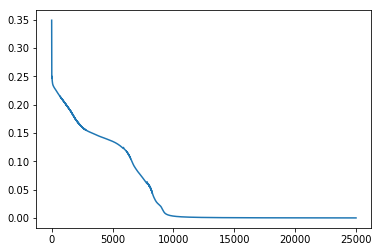

min error:  0.00018220166


In [160]:
plt.plot(errors)
plt.show()

min_error = np.min(errors)
print("min error: ", min_error)
# plt.plot(training_errors)
# plt.show()
# plt.plot(validation_accuracy)
# plt.show()


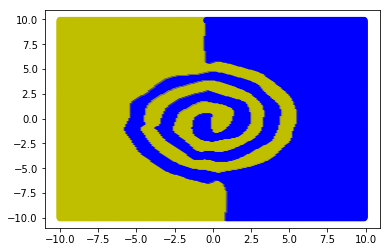

In [161]:
# generate a mesh grid act_range x act_range
mesh_x, mesh_y = np.meshgrid(activation_range, activation_range)
plt.scatter(mesh_x, mesh_y, c=['b' if np.round(pred) == 0 else 'y' for pred in predictions])
plt.show()

In [153]:
# for x_point, y_point, pred in list(zip(mesh_x, mesh_y, predictions)):
#     print(x_point, y_point, pred)
#     break
    
np_mesh_x = np.array(mesh_x)
print(np_mesh_x.shape)

(200, 200)


In [76]:
# diff = np.array([y_prime[0] == y[0] for y_prime, y in zip(validation_pred, validation_y) ]).astype(int)
# print(diff.sum()/validation_y.shape[0])

0.34210526315789475
